Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import Word

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score,precision_score, confusion_matrix, accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn import metrics

Dataset upload to colab

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving test.csv to test.csv
Saving train.csv to train.csv


Importing train and test dataset and joining into one dataframe

In [ ]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [ ]:
df = pd.concat([df1,df2],axis=0)

In [ ]:
df.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0        0.0               0.0   0.0     0.0    0.0     0.0  
1        0.0               0.0   0.0     0.0    0.0     0.0  
2        0.0               0.0   0.0     0.0    0.0     0.0  
3        0.0               0.0   0.0     0.0    0.0     0.0  
4        0.0               0.0   0.0     0.0    0.0     0.0

Since two files are combines ,need to reset index

In [ ]:
df = df.reset_index()

In [ ]:
df.shape

(312735, 8)

In [ ]:
df1.shape

(159571, 8)

In [ ]:
df2.shape

(153164, 2)

Average words per review

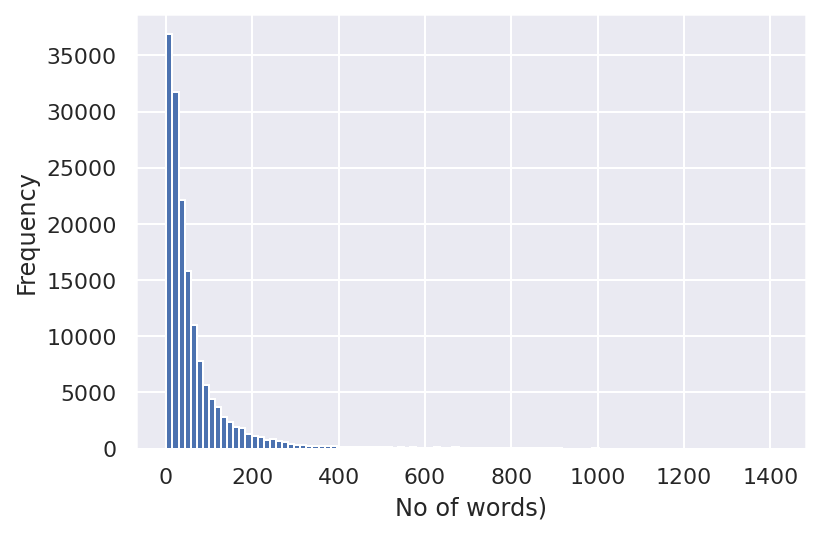

In [ ]:
words_per_review = df1.comment_text.apply(lambda x: len(x.split()))
words_per_review.hist(bins=100)
plt.xlabel('No of words)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
words_per_review.mean()

67.27251818939531

In [ ]:
words_per_review.skew()

4.195282915054288

Character length of each word

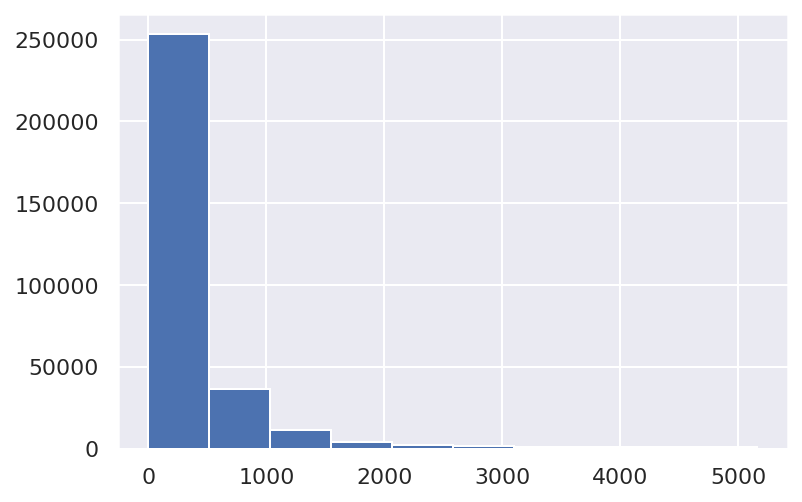

In [ ]:
df['char_length']=df['comment_text'].apply(len)
df['char_length'].hist()

In [ ]:
def wl(text):
    return len(text.split(" "))
df1['word_length']=df1['comment_text'].apply(wl)

In [ ]:
wl('I am a good boy')

5

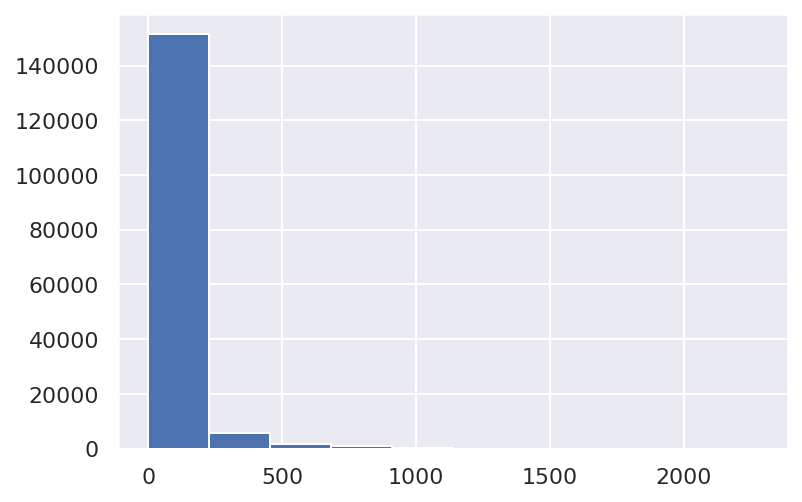

In [ ]:
df1['word_length'].hist()

Unique word count

In [ ]:
df['unique_word_count'] =df['comment_text'].apply(lambda x: len(set(str(x).split())))

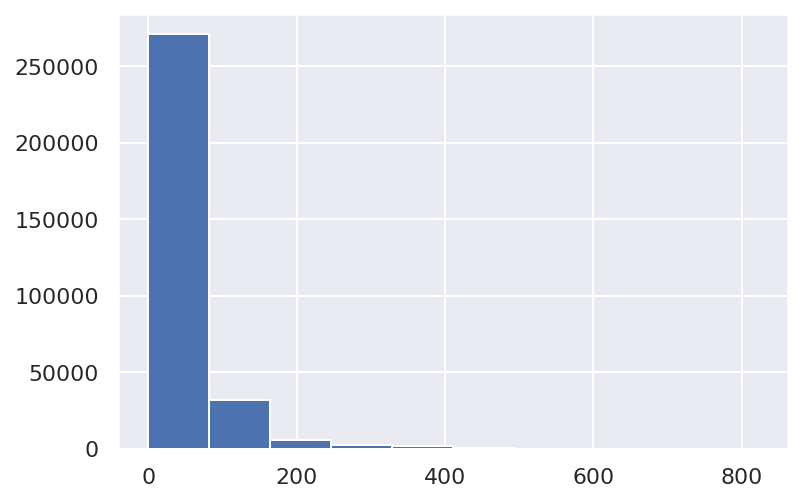

In [ ]:
df['unique_word_count'].hist()

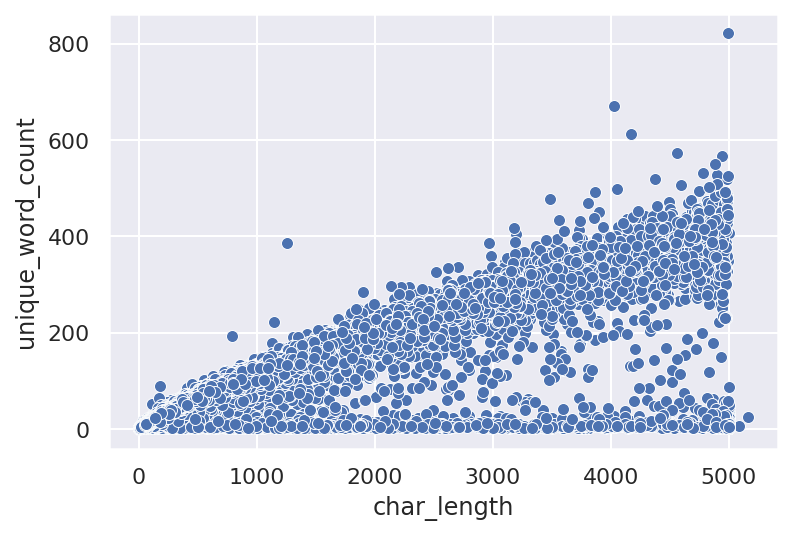

In [ ]:
sns.scatterplot(x='char_length',y='unique_word_count',data=df)

Wordcloud of training dataset without cleaning

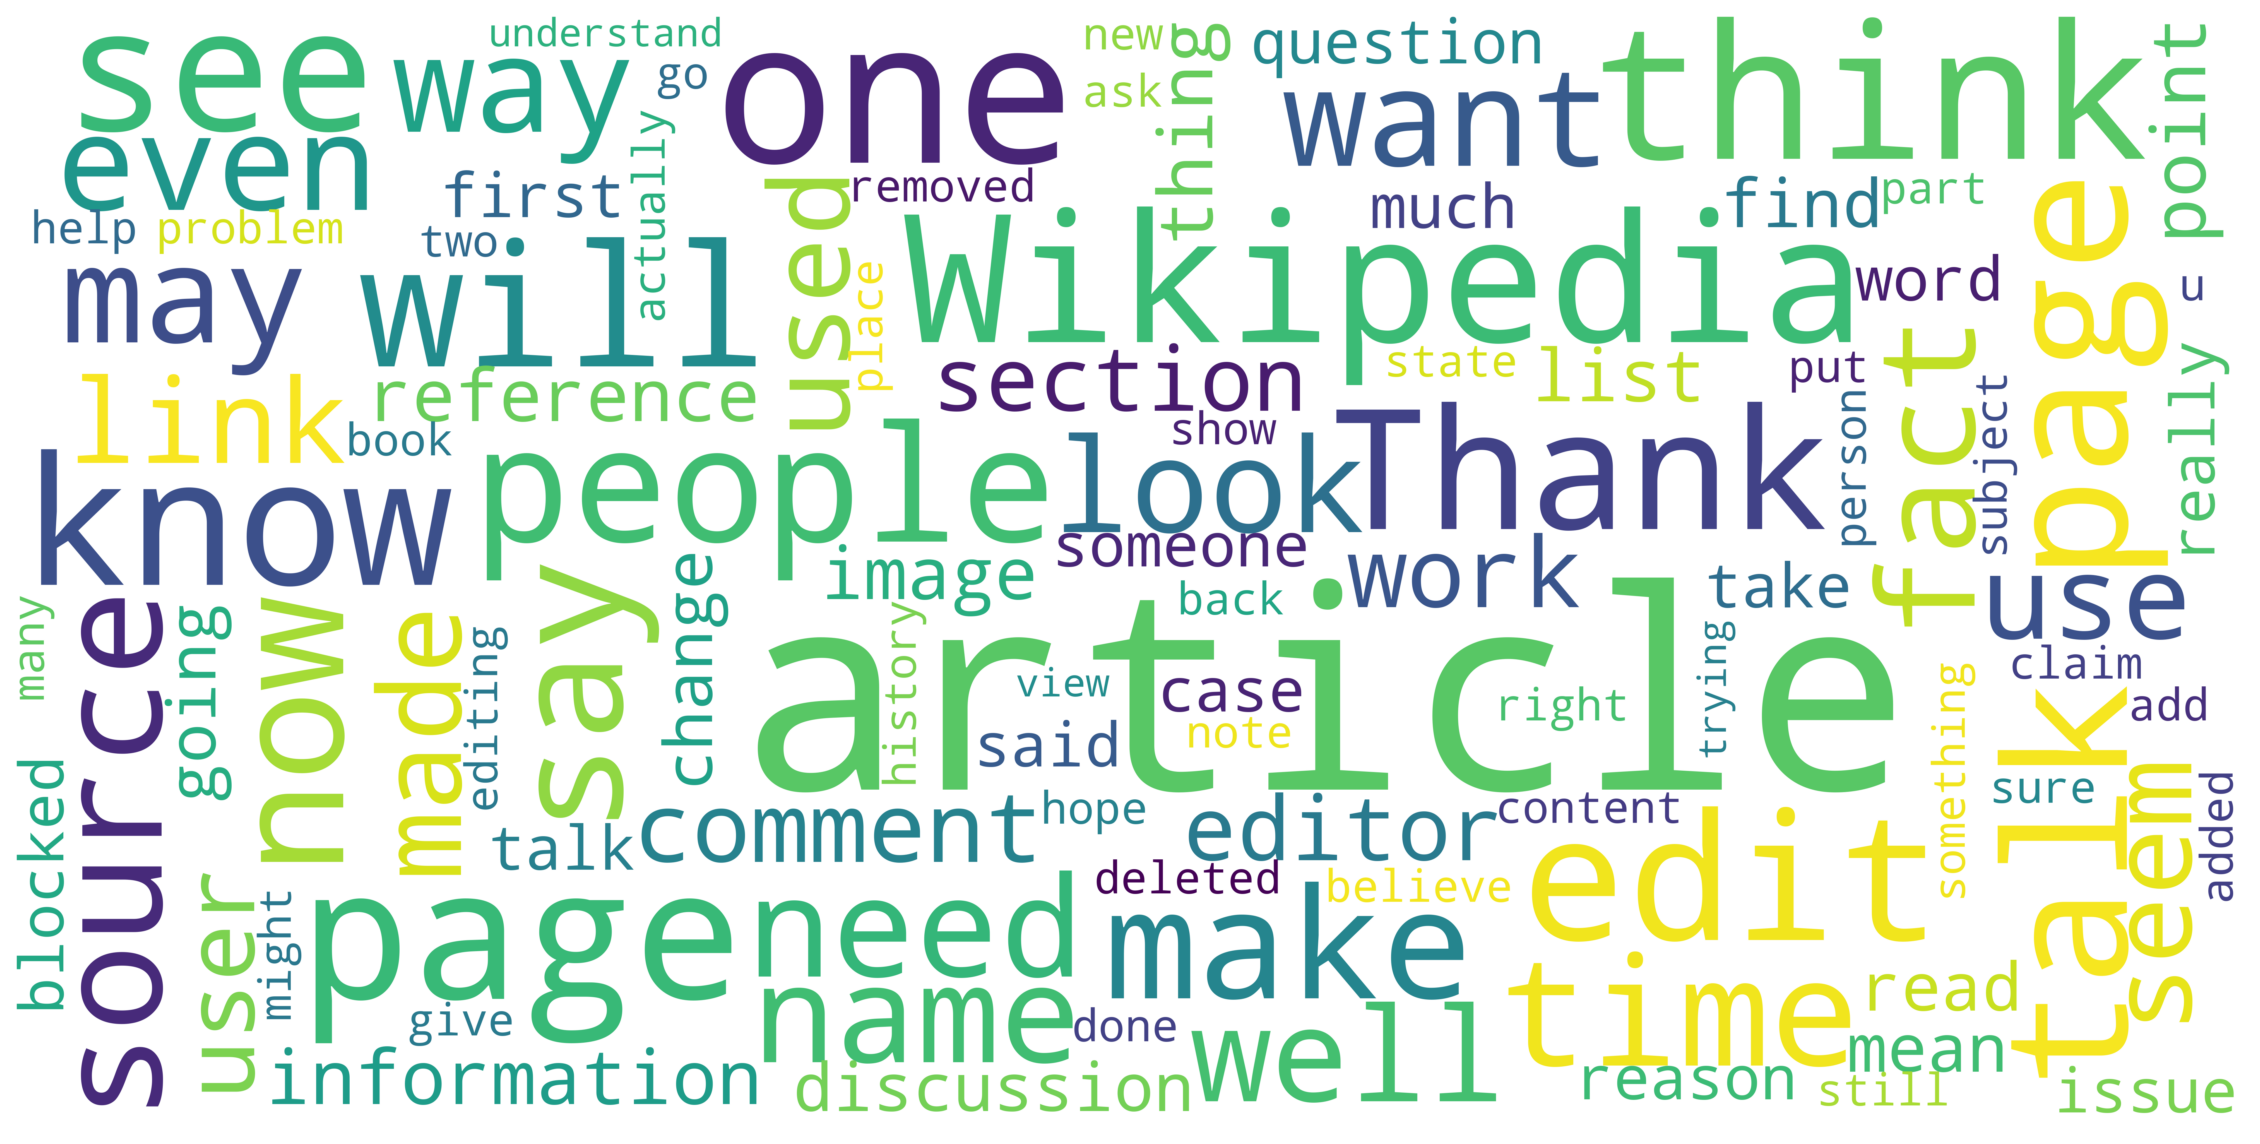

In [ ]:
word_cloud_text = ' '.join(df1['comment_text'])

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white",
                      scale = 10,
                      width=800,
                      height=400
                     ).generate(word_cloud_text)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

Value counts of comment type:

In [ ]:
data_count = df1.iloc[:,2:8].sum()
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

<Figure size 576x576 with 0 Axes>

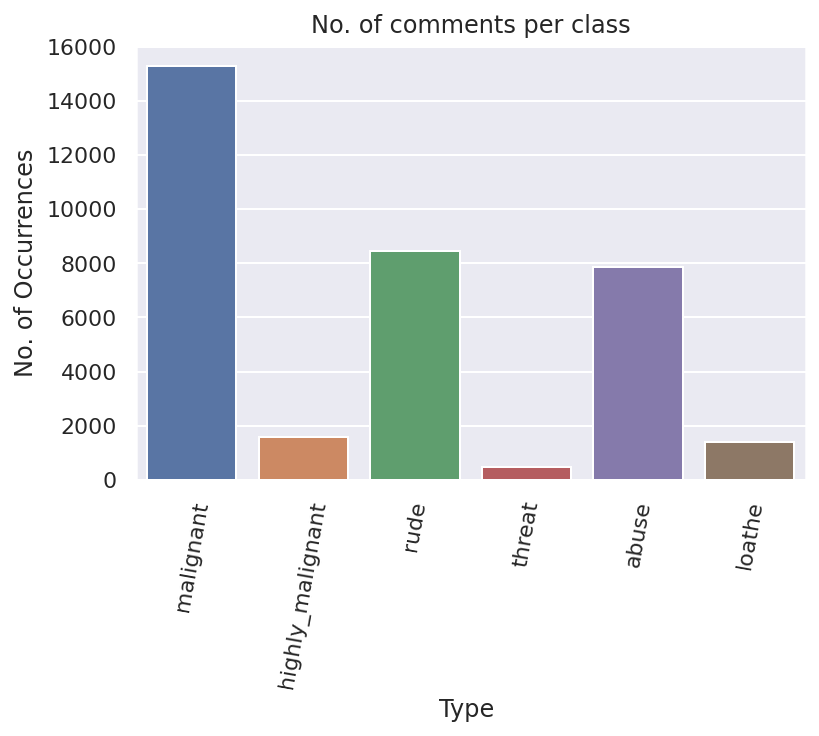

<Figure size 576x576 with 0 Axes>

In [ ]:
sns.barplot(data_count.index,data_count.values)
plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
plt.xticks(rotation=80)
plt.figure(figsize = (8,8))

% of comments in various categories'


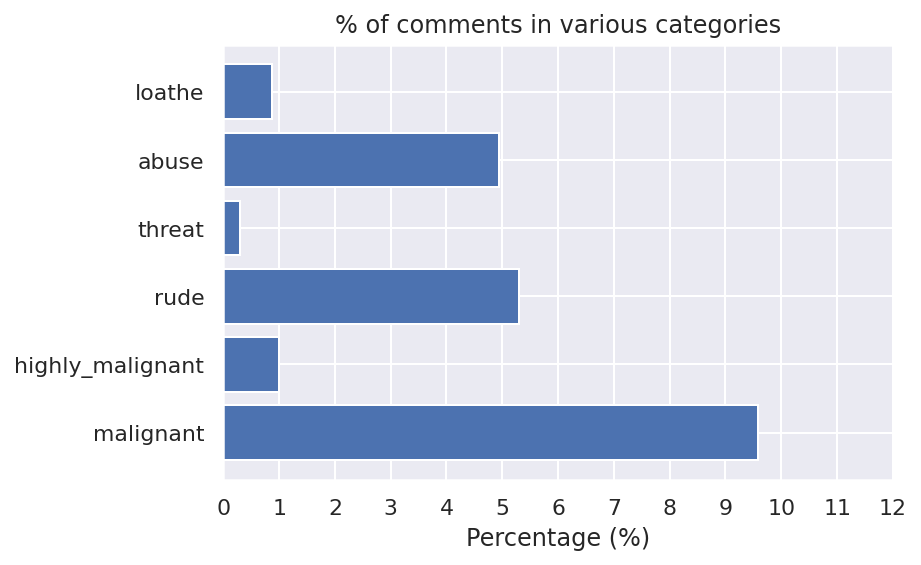

In [ ]:
malignant = df1['malignant'].sum()/len(df1) * 100
highly_malignant = df1['highly_malignant'].sum()/len(df1) * 100
rude = df1['rude'].sum()/len(df1) * 100
threat = df1['threat'].sum()/len(df1) * 100
abuse = df1['abuse'].sum()/len(df1) * 100
loathe = df1['loathe'].sum()/len(df1) * 100
ax = plt.barh(np.arange(6),[malignant, highly_malignant, rude,threat, abuse, loathe])
plt.xlabel('Percentage (%)')
plt.xticks(np.arange(0, 13, 1))
plt.title('% of comments in various categories')
plt.yticks(np.arange(6), ('malignant', 'highly_malignant', 'rude','threat', 'abuse', 'loathe' ))
plt.show()

Heatmap of variation of type of comments

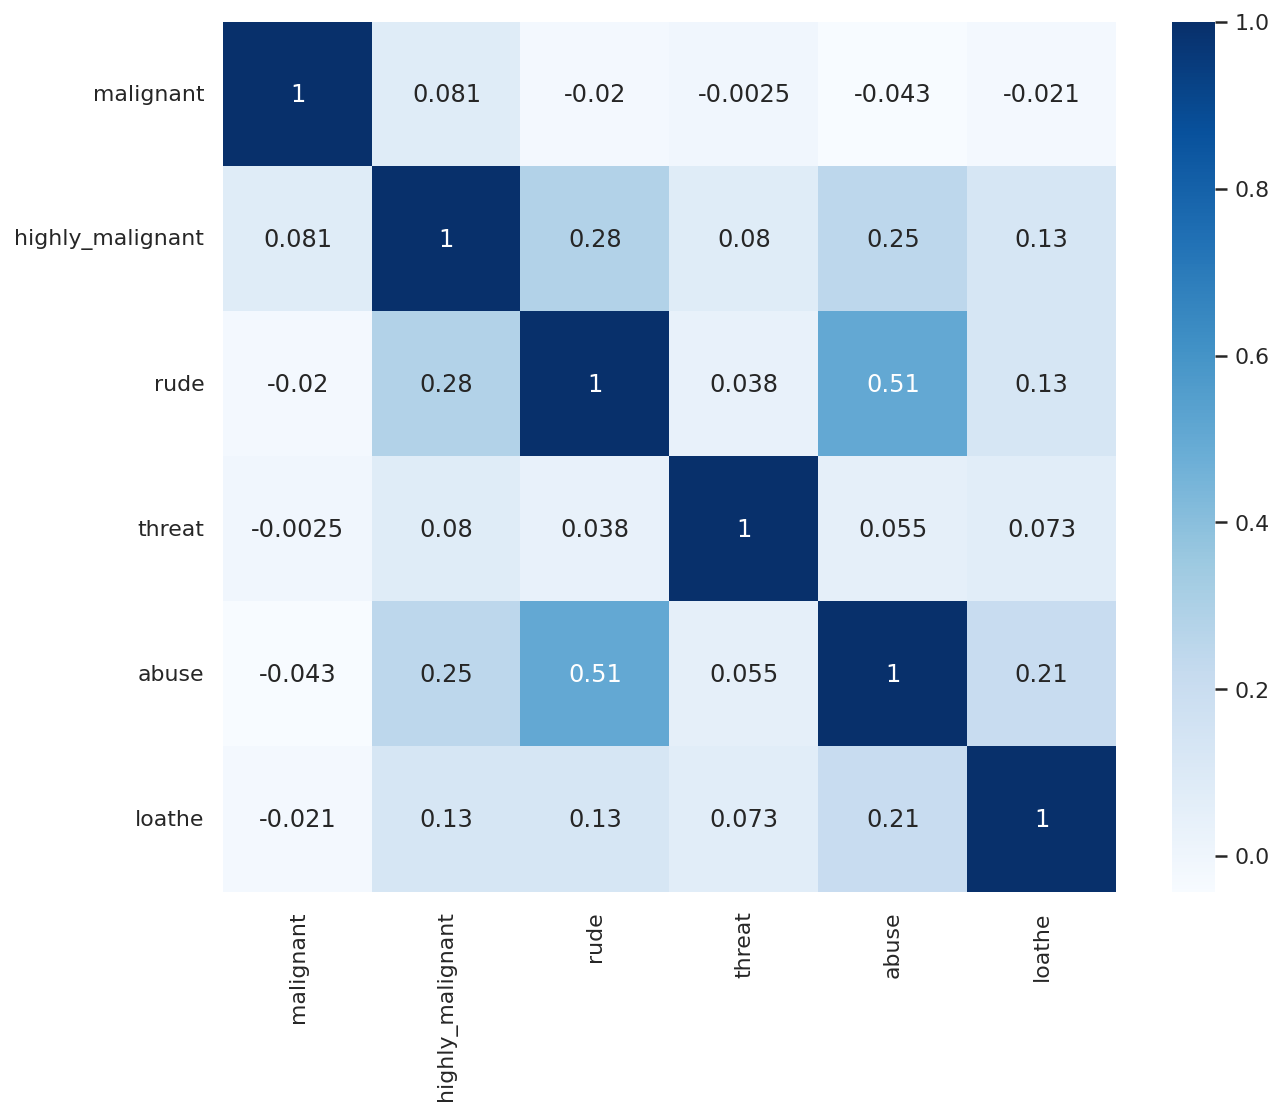

In [ ]:
rows = df1.iloc[:, 2:8].sum(axis=1)
temp = df1.iloc[:, 2:8]
train_corr = temp[rows > 0]
corr = train_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="Blues")

To understand how type of comments is distributed, the dataframe is converted to text, and then combine,so we can get the combination and value count of type of comments

In [ ]:
df2['malignant'] = df1['malignant'].astype(str).str.replace('0','Not').str.replace('1','malignant')

df2['highly_malignant'] = df1['highly_malignant'].astype(str).str.replace('0','Not').str.replace('1','highly_malignant')

df2['rude'] = df1['rude'].astype(str).str.replace('0','Not').str.replace('1','rude')

df2['threat'] = df1['threat'].astype(str).str.replace('0','Not').str.replace('1','threat')

df2['abuse'] = df1['abuse'].astype(str).str.replace('0','Not').str.replace('1','abuse')

df2['loathe'] = df1['loathe'].astype(str).str.replace('0','Not').str.replace('1','loathe')

In [ ]:
df2['total'] = df2['malignant'] + ' '+ df2['highly_malignant'] + ' ' +df2['rude'] + ' ' +df2['threat'] + ' ' +df2['abuse'] + ' ' + df2['loathe']

df2['values'] = df2['total'].str.replace('Not','')

df2['values'] = df2['values'].str.strip()

df2['values'].value_counts()

                                                       137586
malignant                                                5423
malignant  rude  abuse                                   3654
malignant  rude                                          1687
malignant    abuse                                       1167
malignant highly_malignant rude  abuse                    958
malignant  rude  abuse loathe                             590
rude                                                      311
abuse                                                     292
malignant highly_malignant rude  abuse loathe             257
rude  abuse                                               173
malignant highly_malignant rude                           154
malignant     loathe                                      132
malignant  rude threat abuse                              125
malignant    abuse loathe                                 125
malignant   threat                                        106
malignan

In [ ]:
df1['com'] = df1['malignant'] +  df1['highly_malignant'] + df1['rude'] + df1['threat'] + df1['abuse'] + df1['loathe']

Value count of clean and toxic comments

In [ ]:
df1['com'] = df1['com'].astype(str).str.replace('0','clean').str.replace('1','toxic').str.replace('2','toxic').str.replace('3','toxic').str.replace('4','toxic').str.replace('5','toxic').str.replace('6','toxic')

df1['com'].value_counts()

clean    143346
toxic     16225
Name: com, dtype: int64

In [ ]:
targets

['malignant',
 'highly_malignant',
 'rude',
 'threat',
 'abuse',
 'loathe',
 'total',
 'values']

In [ ]:
targets = list(df2.columns[1:-2])
df_targets = df1[targets].copy()

df_targets.head()

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   

   highly_malignant  rude  threat  abuse  loathe  
0                 0     0       0      0       0  
1                 0     0       0      0       0  
2                 0     0       0      0       0  
3                 0     0       0      0       0  
4                 0     0       0      0       0

Average comment length

In [ ]:
df1['length'] = df1.comment_text.apply(lambda x: len(x))
print("Average toxic comment length: %d" % int(np.mean(df1[(df1.com=='toxic')].length)))
print("Average clean comment length: %d" % int(np.mean(df1[(df1.com=='clean')].length)))

Average toxic comment length: 303
Average clean comment length: 404


Median comment length

In [ ]:
print("Median toxic comment length: %d" % int(np.median(df1[(df1.com=='toxic')].length)))
print("Median clean comment length: %d" % int(np.median(df1[(df1.com=='clean')].length)))

Median toxic comment length: 128
Median clean comment length: 216


Upper case characters :

In [ ]:
def upper_case(x):
    return sum([1 for c in x if c.isupper()]) / (sum(([1 for c in x if c.isalpha()])) + 1)
df1['caps'] = df1.comment_text.apply(lambda x: upper_case(x))
print("Percent of capitalized characters in toxic comments: %d%%" % int(100 * np.mean(df1[(df1.com=='toxic')].caps)))
print("Percent of capitalized characters in clean comments: %d%%" % int(100 * np.mean(df1[(df1.com=='clean')].caps)))

Percent of capitalized characters in toxic comments: 14%
Percent of capitalized characters in clean comments: 5%


Average word length of clean and toxic characters

In [ ]:
def word_length(s):
    s = s.split(' ')
    return np.mean([len(w) for w in s if w.isalpha()])
df1['word_length'] = df1.comment_text.apply(lambda x: word_length(x))

print("Average word length in toxic comments: %.1f" % np.mean(df1[(df1.com=='toxic')].word_length))
print("Average word length in clean comments: %.1f" % np.mean(df1[(df1.com=='clean')].word_length))

Average word length in toxic comments: 4.1
Average word length in clean comments: 4.4


Average exclamations of clean and toxic characters

In [ ]:
df1['exclamation'] = df1.comment_text.apply(lambda s: len([c for c in s if c == '!']))
print("Exclamations in toxic comments: %.1f" % np.mean(df1[(df1.com=='toxic')].exclamation))
print("Exclamations in clean comments: %.1f" % np.mean(df1[(df1.com=='clean')].exclamation))

Exclamations in toxic comments: 3.5
Exclamations in clean comments: 0.3


In [ ]:
df1['question'] = df1.comment_text.apply(lambda s: len([c for c in s if c == '?']))
print("questions in toxic comments: %.1f" % np.mean(df1[(df1.com=='toxic')].question))
print("questions in clean comments: %.1f" % np.mean(df1[(df1.com=='clean')].question))

questions in toxic comments: 0.6
questions in clean comments: 0.4


Replace white space in comments

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x: re.sub('\s+', ' ', x))

Lowercase :

In [ ]:
df['comment_text'] = df['comment_text'].apply(lambda x: x.lower())

In [ ]:
df['comment_text'] = df['comment_text'].str.replace('.',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


Importing stopwords

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['comment_text'][0]

"explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac  and please don't remove the template from the talk page since i'm retired now 89 205 38 27"

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['the', "n't"])
len(stop_words)

181

In [ ]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
312730    . \n i totally agree, this stuff is nothing bu...
312731    == Throw from out field to home plate. == \n\n...
312732    " \n\n == Okinotorishima categories == \n\n I ...
312733    " \n\n == ""One of the founding nations of the...
312734    " \n :::Stop already. Your bullshit is not wel...
Name: comment_text, Length: 312735, dtype: object

Impact of stopwords

In [ ]:
stop_words = stop_words
without_stop_words = []
stopword = []
sentence = df['comment_text'][1]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('Original Sentence\n', sentence)
print('\nStopwords in the sentence\n', stopword)
print('\nNon-stopwords in the sentence\n', without_stop_words)

Original Sentence
 d'aww! he matches this background colour i'm seemingly stuck with  thanks  (talk) 21:51, january 11, 2016 (utc)

Stopwords in the sentence
 ['he', 'this', 'i', 'with']

Non-stopwords in the sentence
 ["d'aww", '!', 'matches', 'background', 'colour', "'m", 'seemingly', 'stuck', 'thanks', '(', 'talk', ')', '21:51', ',', 'january', '11', ',', '2016', '(', 'utc', ')']


In [ ]:
from nltk import word_tokenize

In [ ]:
df['without'] = df['comment_text'].apply(lambda x:' '.join([word for word in word_tokenize(x) if word not in stop_words and len(word)> 2]))

In [ ]:
df['without']

0         explanation edits made username hardcore metal...
1         d'aww matches background colour seemingly stuc...
2         hey man really trying edit war guy constantly ...
3         make real suggestions improvement wondered sec...
4                             sir hero chance remember page
                                ...                        
312730            totally agree stuff nothing too-long-crap
312731    throw field home plate get faster throwing cut...
312732    okinotorishima categories see changes agree co...
312733    one founding nations germany law return quite ...
312734    stop already bullshit welcome fool think kind ...
Name: without, Length: 312735, dtype: object

Most frequent words after removing stopwords

In [ ]:
words_list = []
for sentence in df['without']:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)


[('article', 104735),
 ('wikipedia', 82606),
 ('page', 78256),
 ('would', 57152),
 ('one', 52493),
 ('like', 52374),
 ('please', 51812),
 ('talk', 51292),
 ('see', 39446),
 ('think', 38467),
 ('also', 37213),
 ('fuck', 36813),
 ('people', 34456),
 ('know', 34278),
 ('edit', 30459),
 ('use', 29437),
 ('articles', 28911),
 ('may', 27828),
 ('time', 27828),
 ('get', 25043)]

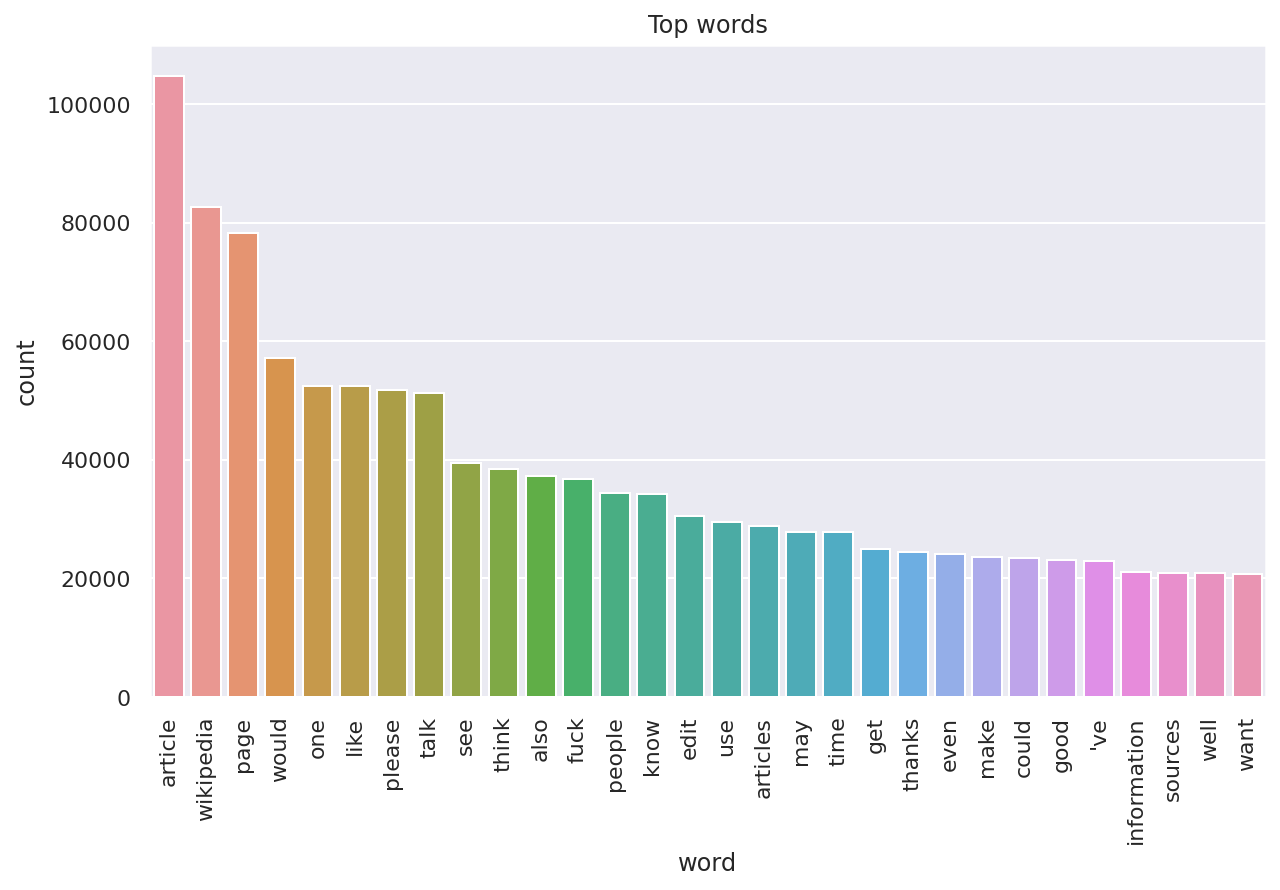

In [ ]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

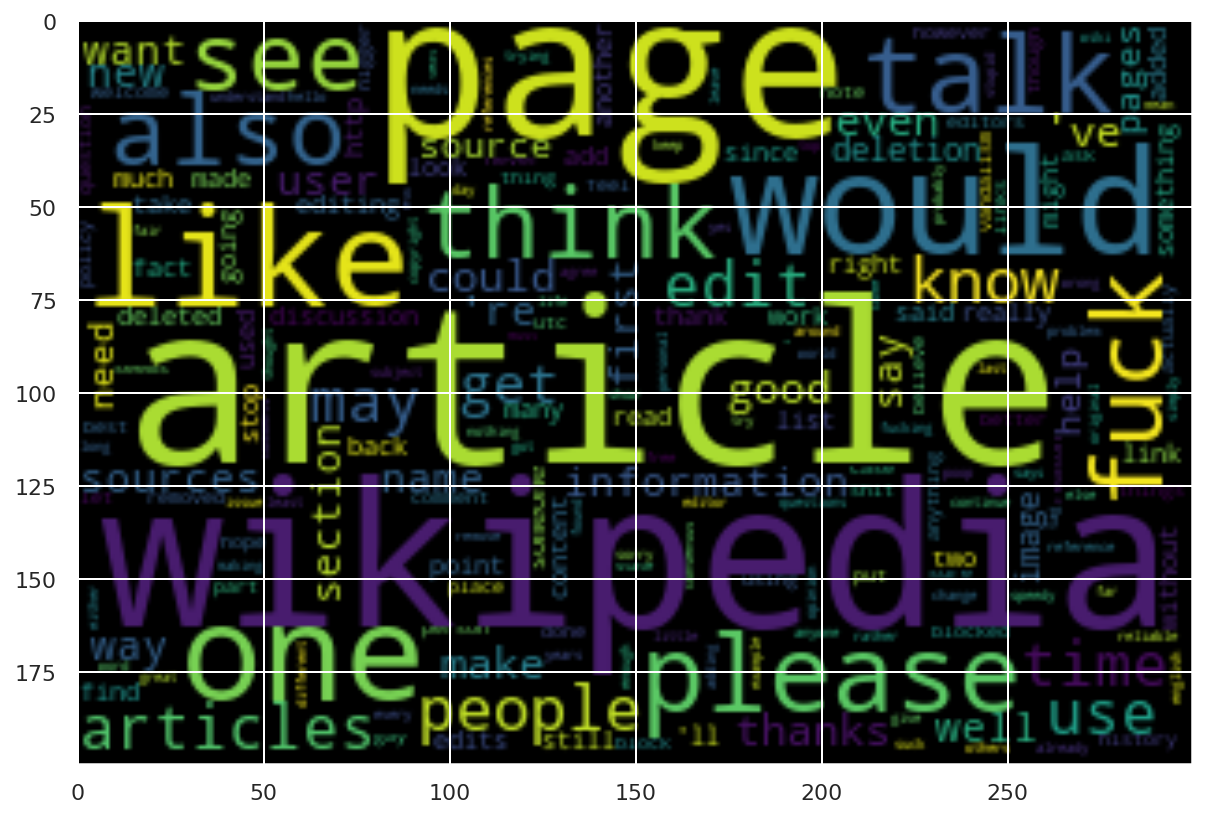

In [ ]:
%config InlineBackend.figure_format = 'retina'

from wordcloud import WordCloud
import wordcloud

wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)


plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

In order to correct the words present in comments, we are importing gensim phrases 
We are importing a pretrained model which contains all the phrases, thereby extracting the pos tags without training it.
Hence we get the correct spelling mostly after lemmatization

In [ ]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

In [ ]:
words_sent = [x.split() for x in df['without']]
words_sent
bigram = Phrases(words_sent, min_count=5, threshold=100)
trigram = Phrases(bigram[words_sent], threshold=100)  

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)


bow = [trigram_phraser[bigram_phraser[word]] for word in words_sent]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
bow[0:1]

[['explanation',
  'edits',
  'made',
  'username',
  'hardcore',
  'metallica',
  'fan',
  'reverted',
  'vandalisms',
  'closure',
  'gas',
  'voted',
  'new_york',
  'dolls',
  'fac',
  'please',
  'remove',
  'template',
  'talk',
  'page',
  'since',
  'retired',
  '205']]

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
doc = nlp(' '.join(bow[0]))
for token in doc:
    print(token ,'=>', token.pos_)

explanation => NOUN
edits => NOUN
made => VERB
username => ADJ
hardcore => PROPN
metallica => PROPN
fan => PROPN
reverted => VERB
vandalisms => NOUN
closure => NOUN
gas => NOUN
voted => VERB
new_york => NOUN
dolls => NOUN
fac => PROPN
please => INTJ
remove => VERB
template => NOUN
talk => NOUN
page => NOUN
since => SCONJ
retired => VERB
205 => NUM


In [ ]:
def lemmatization(words, tags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']): 
    proper_words = []
    for i in words:
        doc = nlp(" ".join(i)) 
        proper_words.append([token.lemma_ for token in doc if token.pos_ in tags])
    return proper_words

In [ ]:
bag_of_words = lemmatization(bow)

In [ ]:
from gensim import corpora
corp_word = corpora.Dictionary(bag_of_words)
print(corp_word)

Dictionary(354523 unique tokens: ['closure', 'doll', 'edit', 'explanation', 'fac']...)


In [ ]:
bag_of_words[81000]

['new_jersey_devil',
 'detroit',
 'red_wing',
 '1990',
 '2000',
 'know',
 'dynasty',
 'devil',
 'question',
 'wing',
 'straight',
 'year',
 'team',
 'pretty',
 'different',
 'team']

After lemmatization we add it to the dataframe, then seperate the dataframe as per type of comments

In [ ]:
df['final'] = bag_of_words


In [ ]:
df_malignant = df.loc[:,['id','final','malignant']]
df_highly_malignant = df.loc[:,['id','final','highly_malignant']]

df_rude = df.loc[:,['id','final','rude']]

df_threat = df.loc[:,['id','final','threat']]

df_abuse = df.loc[:,['id','final','abuse']]

df_loathe = df.loc[:,['id','final','loathe']]

df_malignant = df_malignant.dropna()

df_highly_malignant  =df_highly_malignant.dropna()

df_rude = df_rude.dropna()

df_threat = df_threat.dropna()

df_abuse = df_abuse.dropna()

df_loathe = df_loathe.dropna()


After seperating the dataframe as per the type of comments, we are generating the word cloud for all type of comments

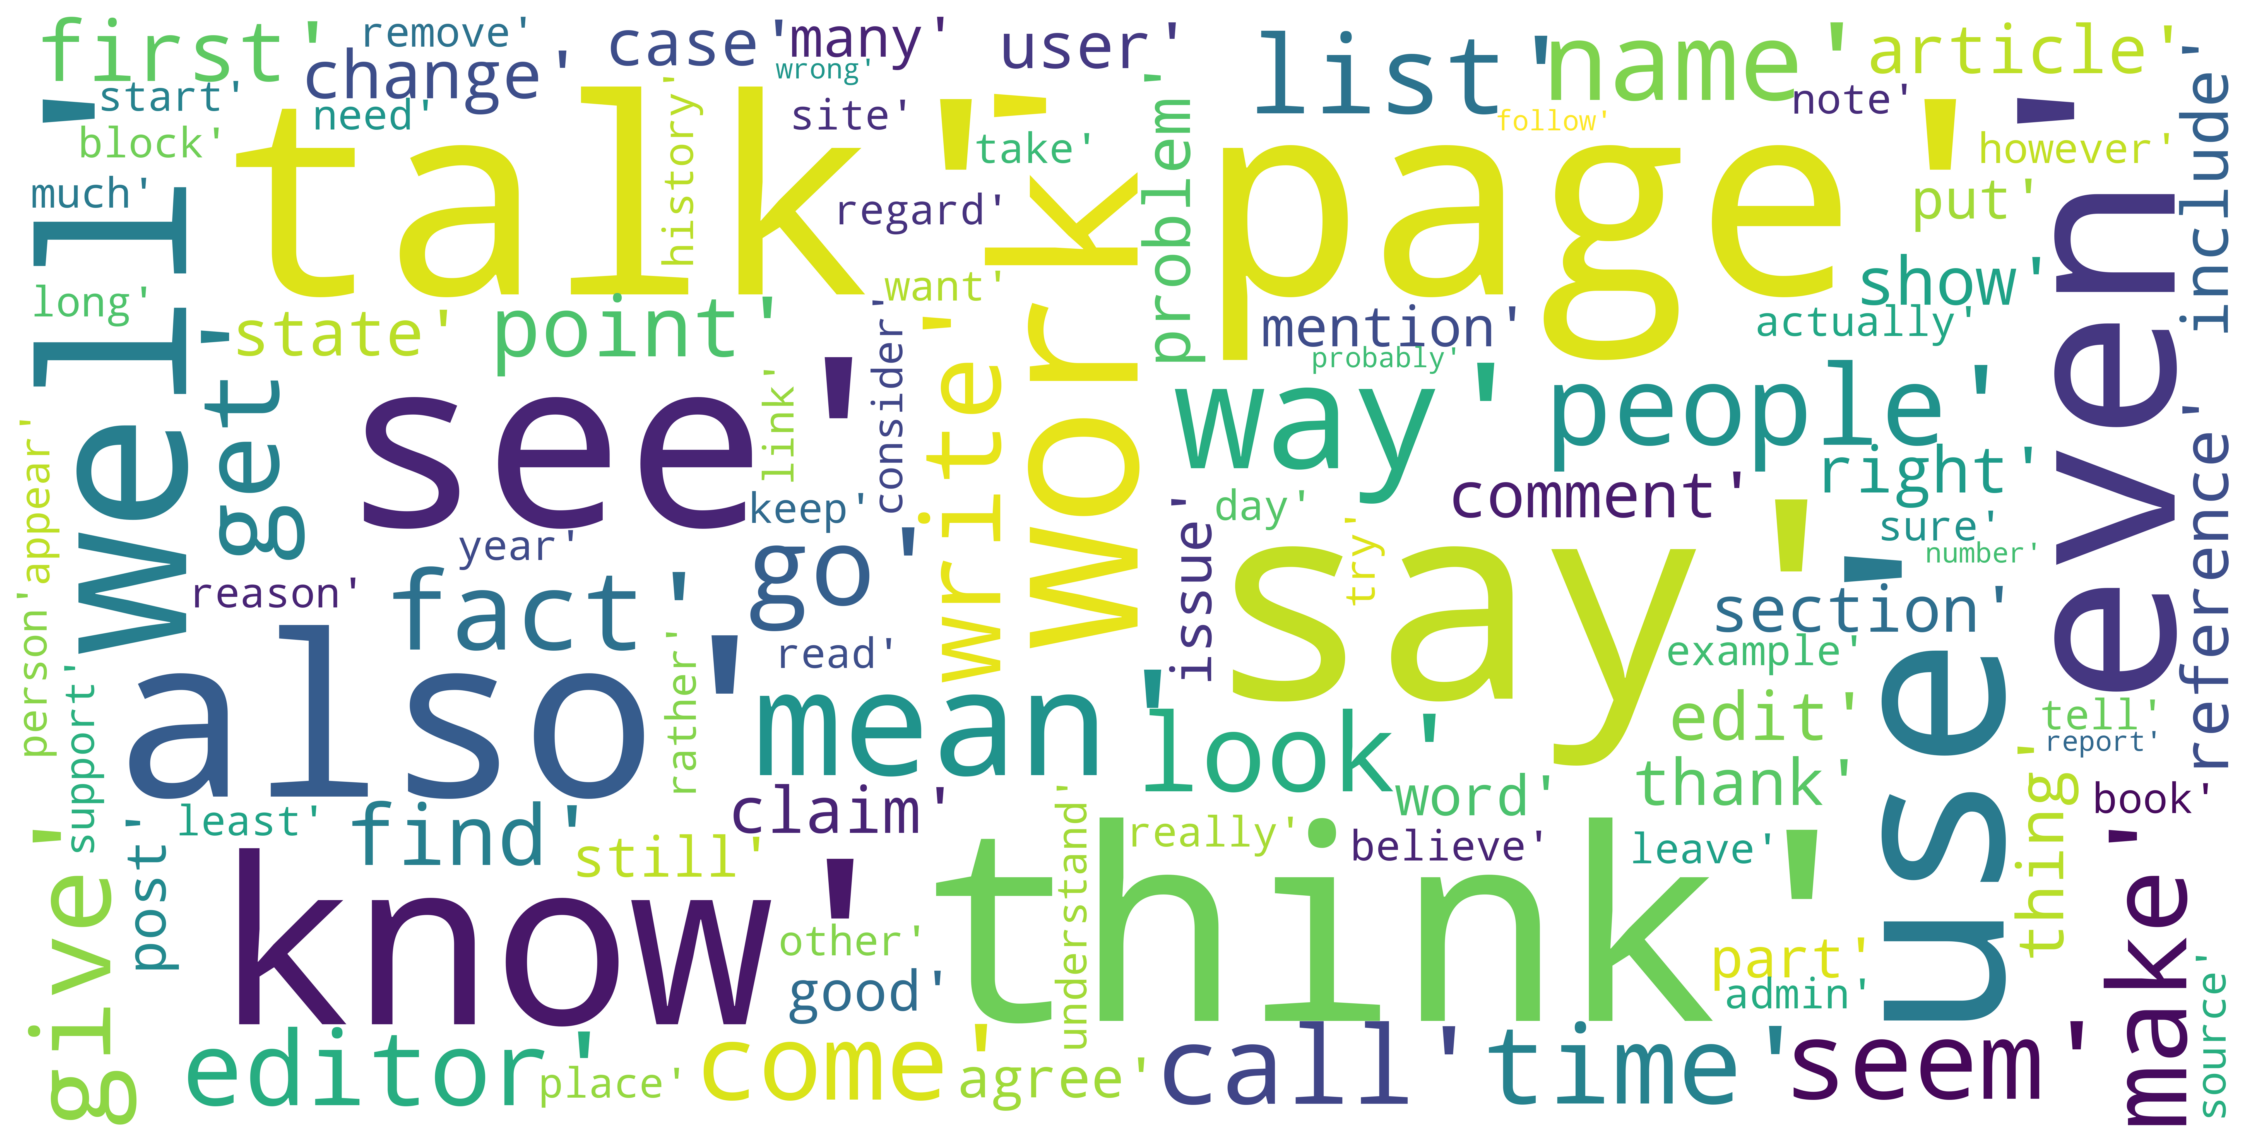

In [ ]:
malignant = (' '.join(str(v) for v in df_malignant['final']))

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white",
                      scale = 10,
                      width=800,
                      height=400
                     ).generate(malignant)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

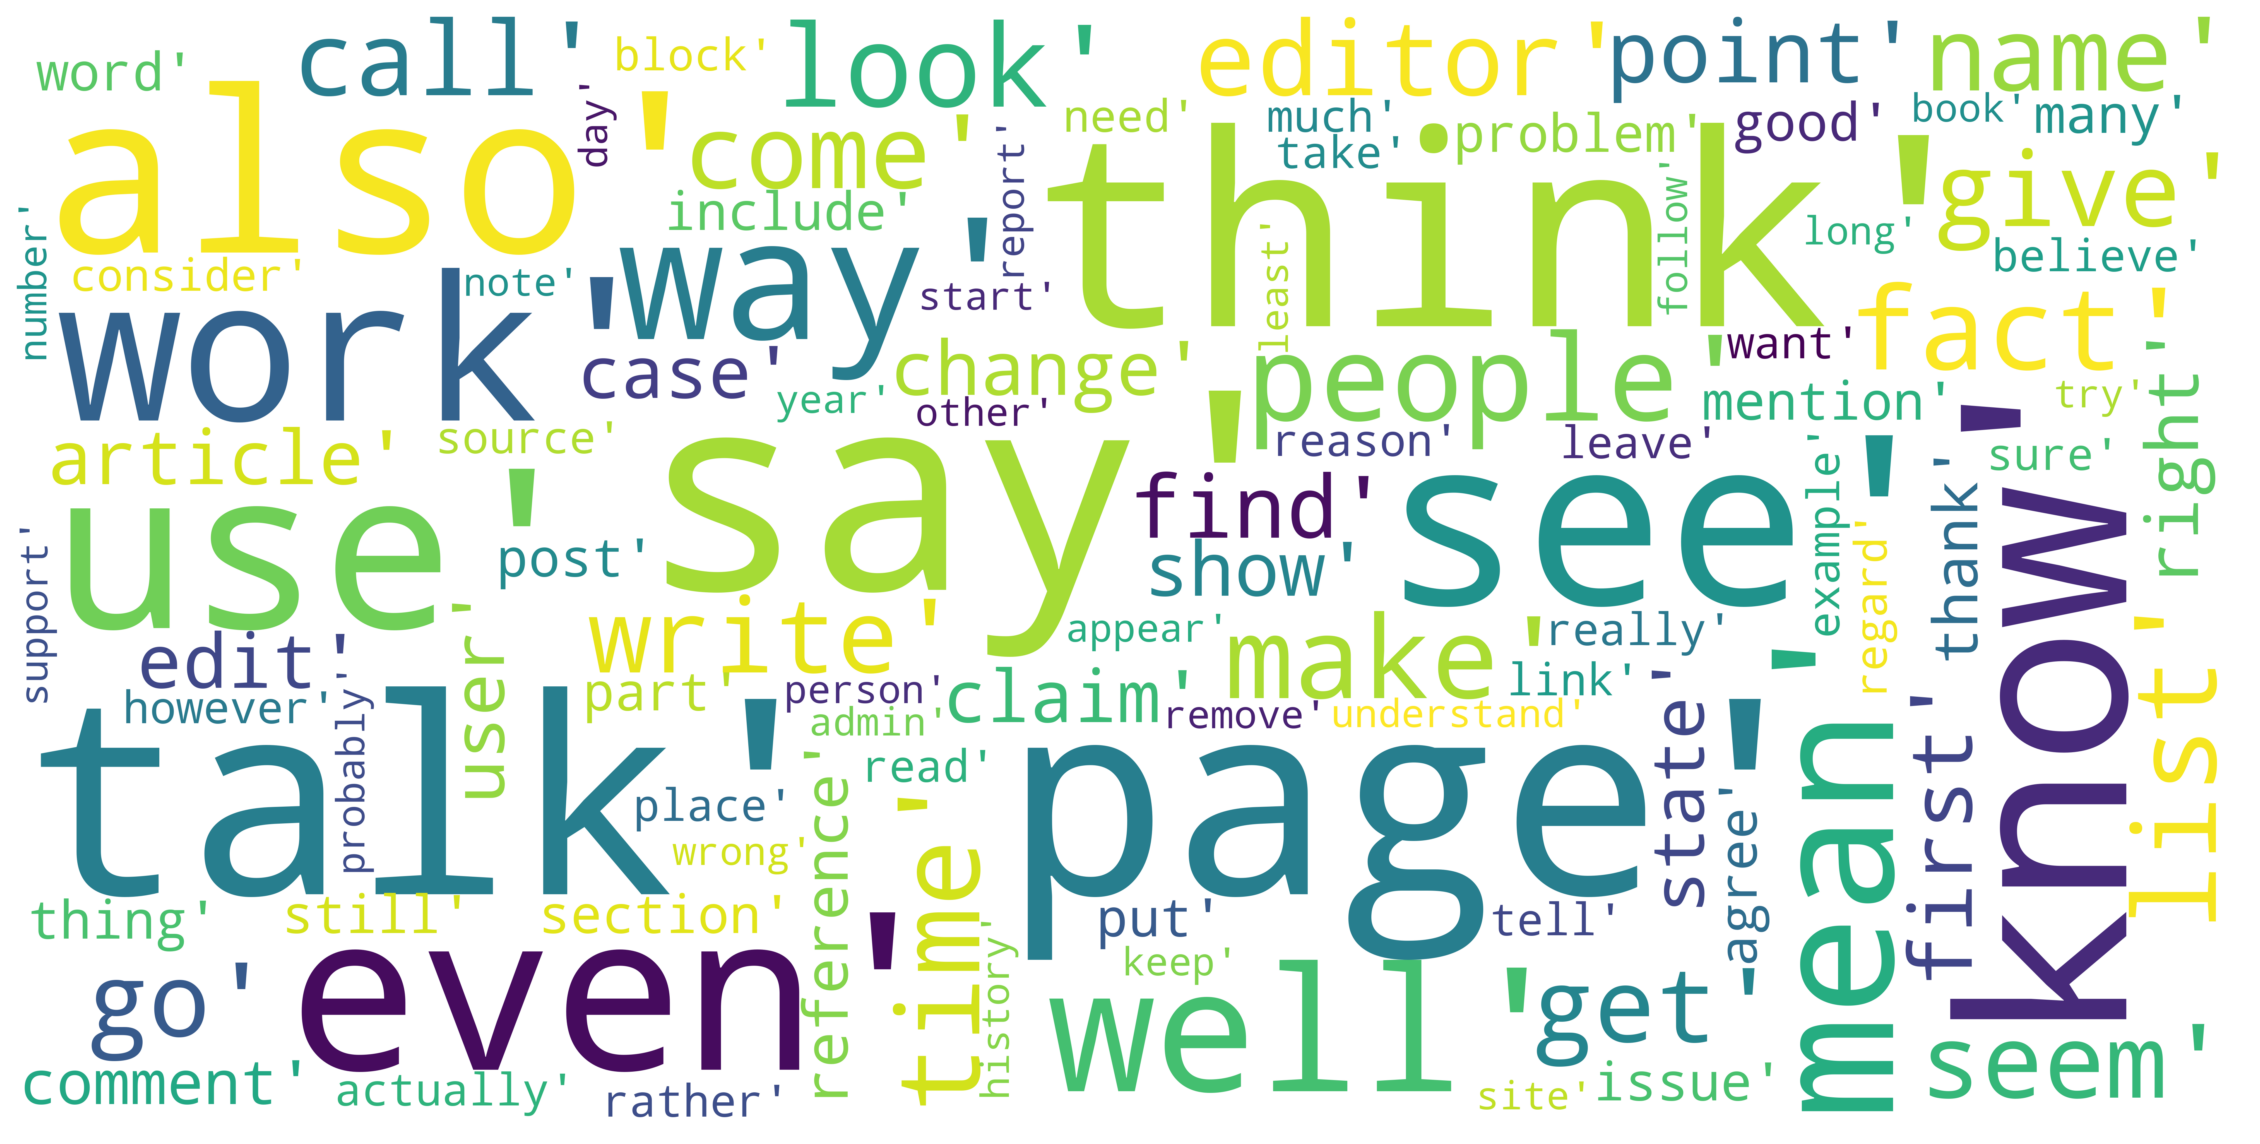

In [ ]:
highly_malignant = (' '.join(str(v) for v in df_highly_malignant['final']))

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white",
                      scale = 10,
                      width=800,
                      height=400
                     ).generate(highly_malignant)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

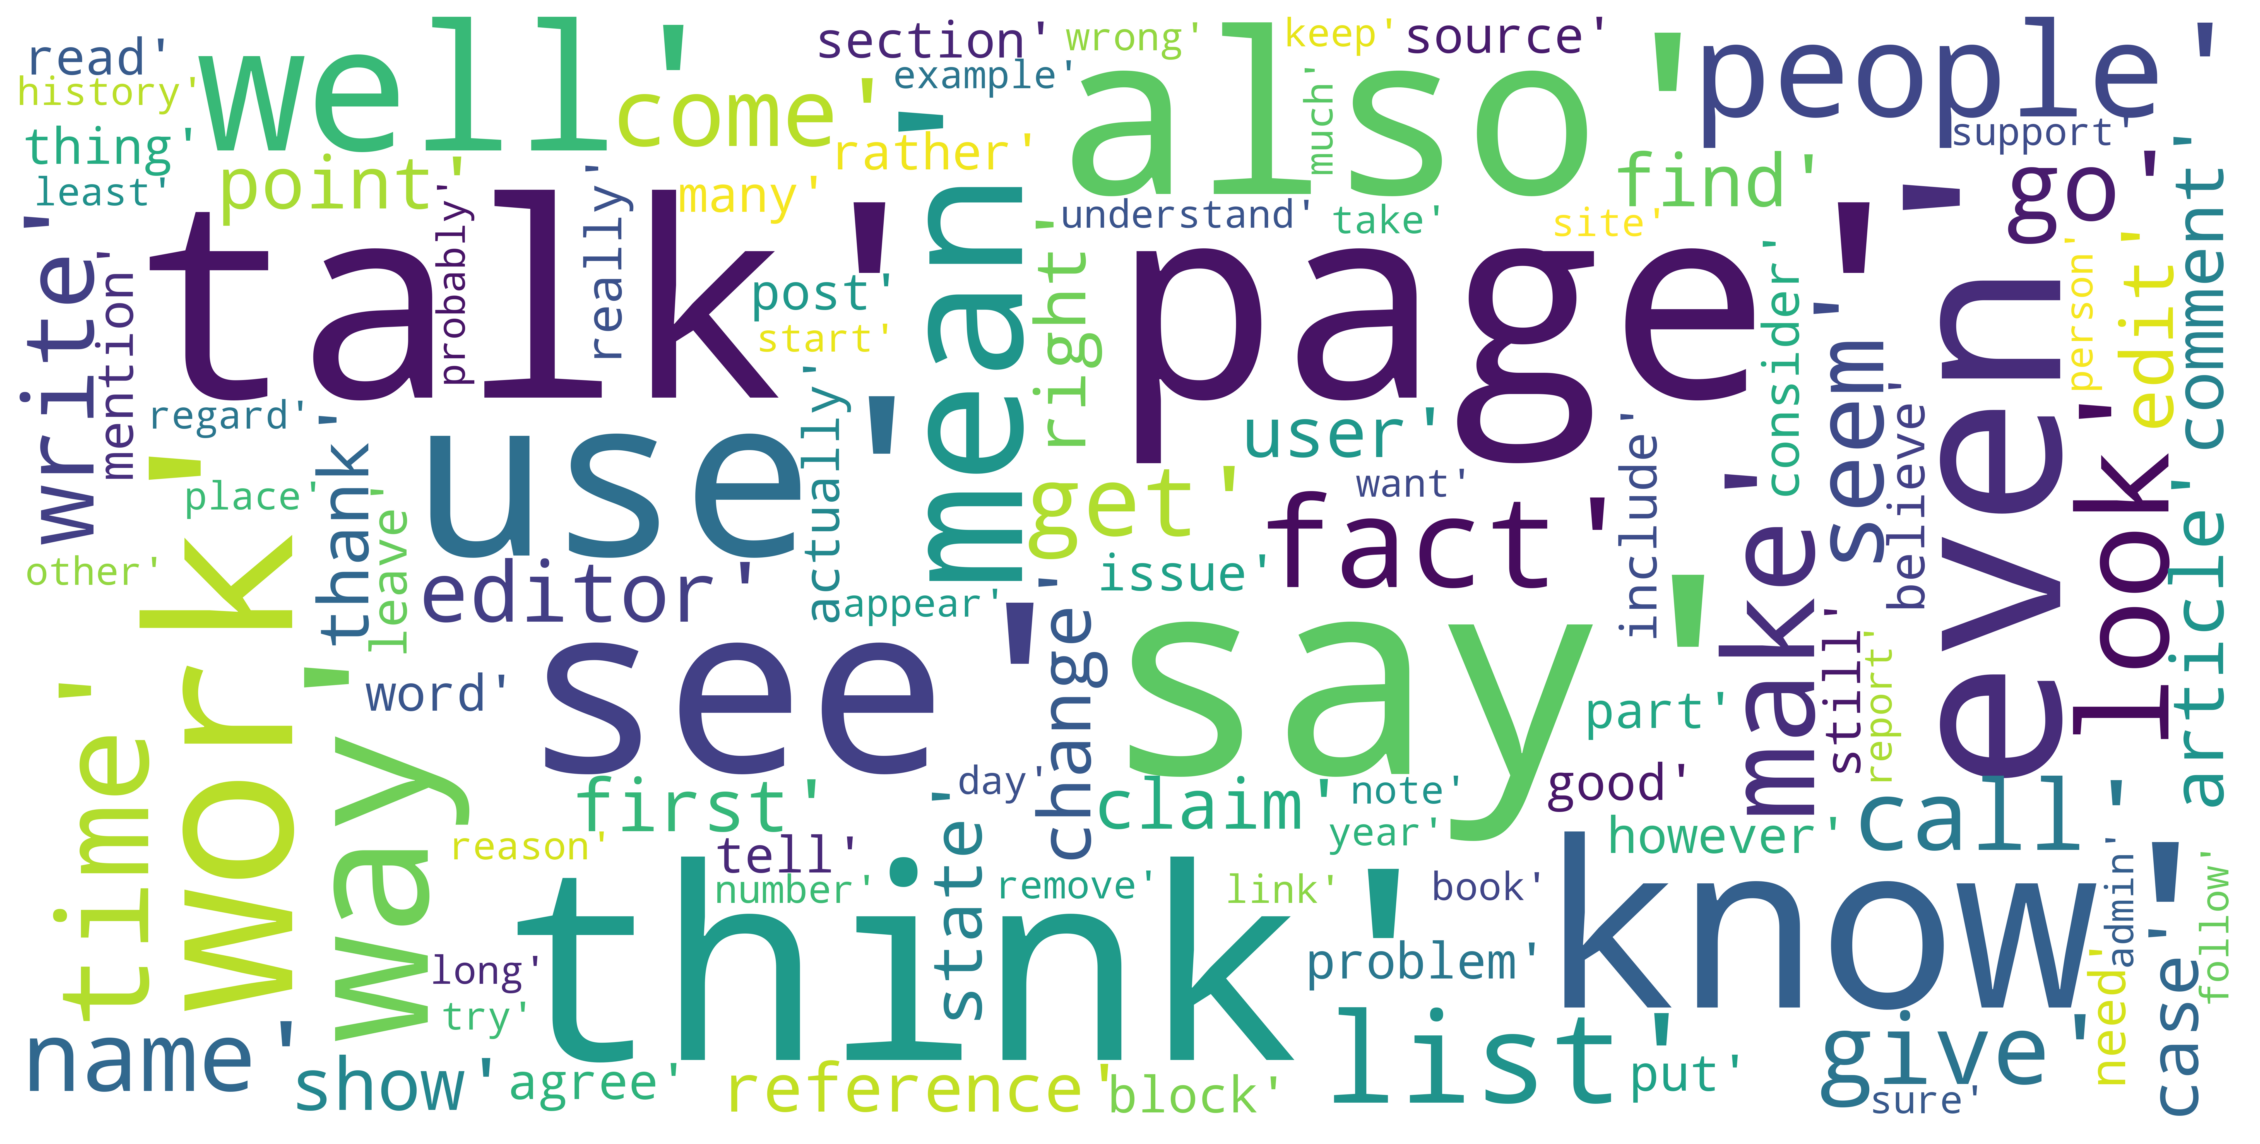

In [ ]:
rude = (' '.join(str(v) for v in df_rude['final']))

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white",
                      scale = 10,
                      width=800,
                      height=400
                     ).generate(rude)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

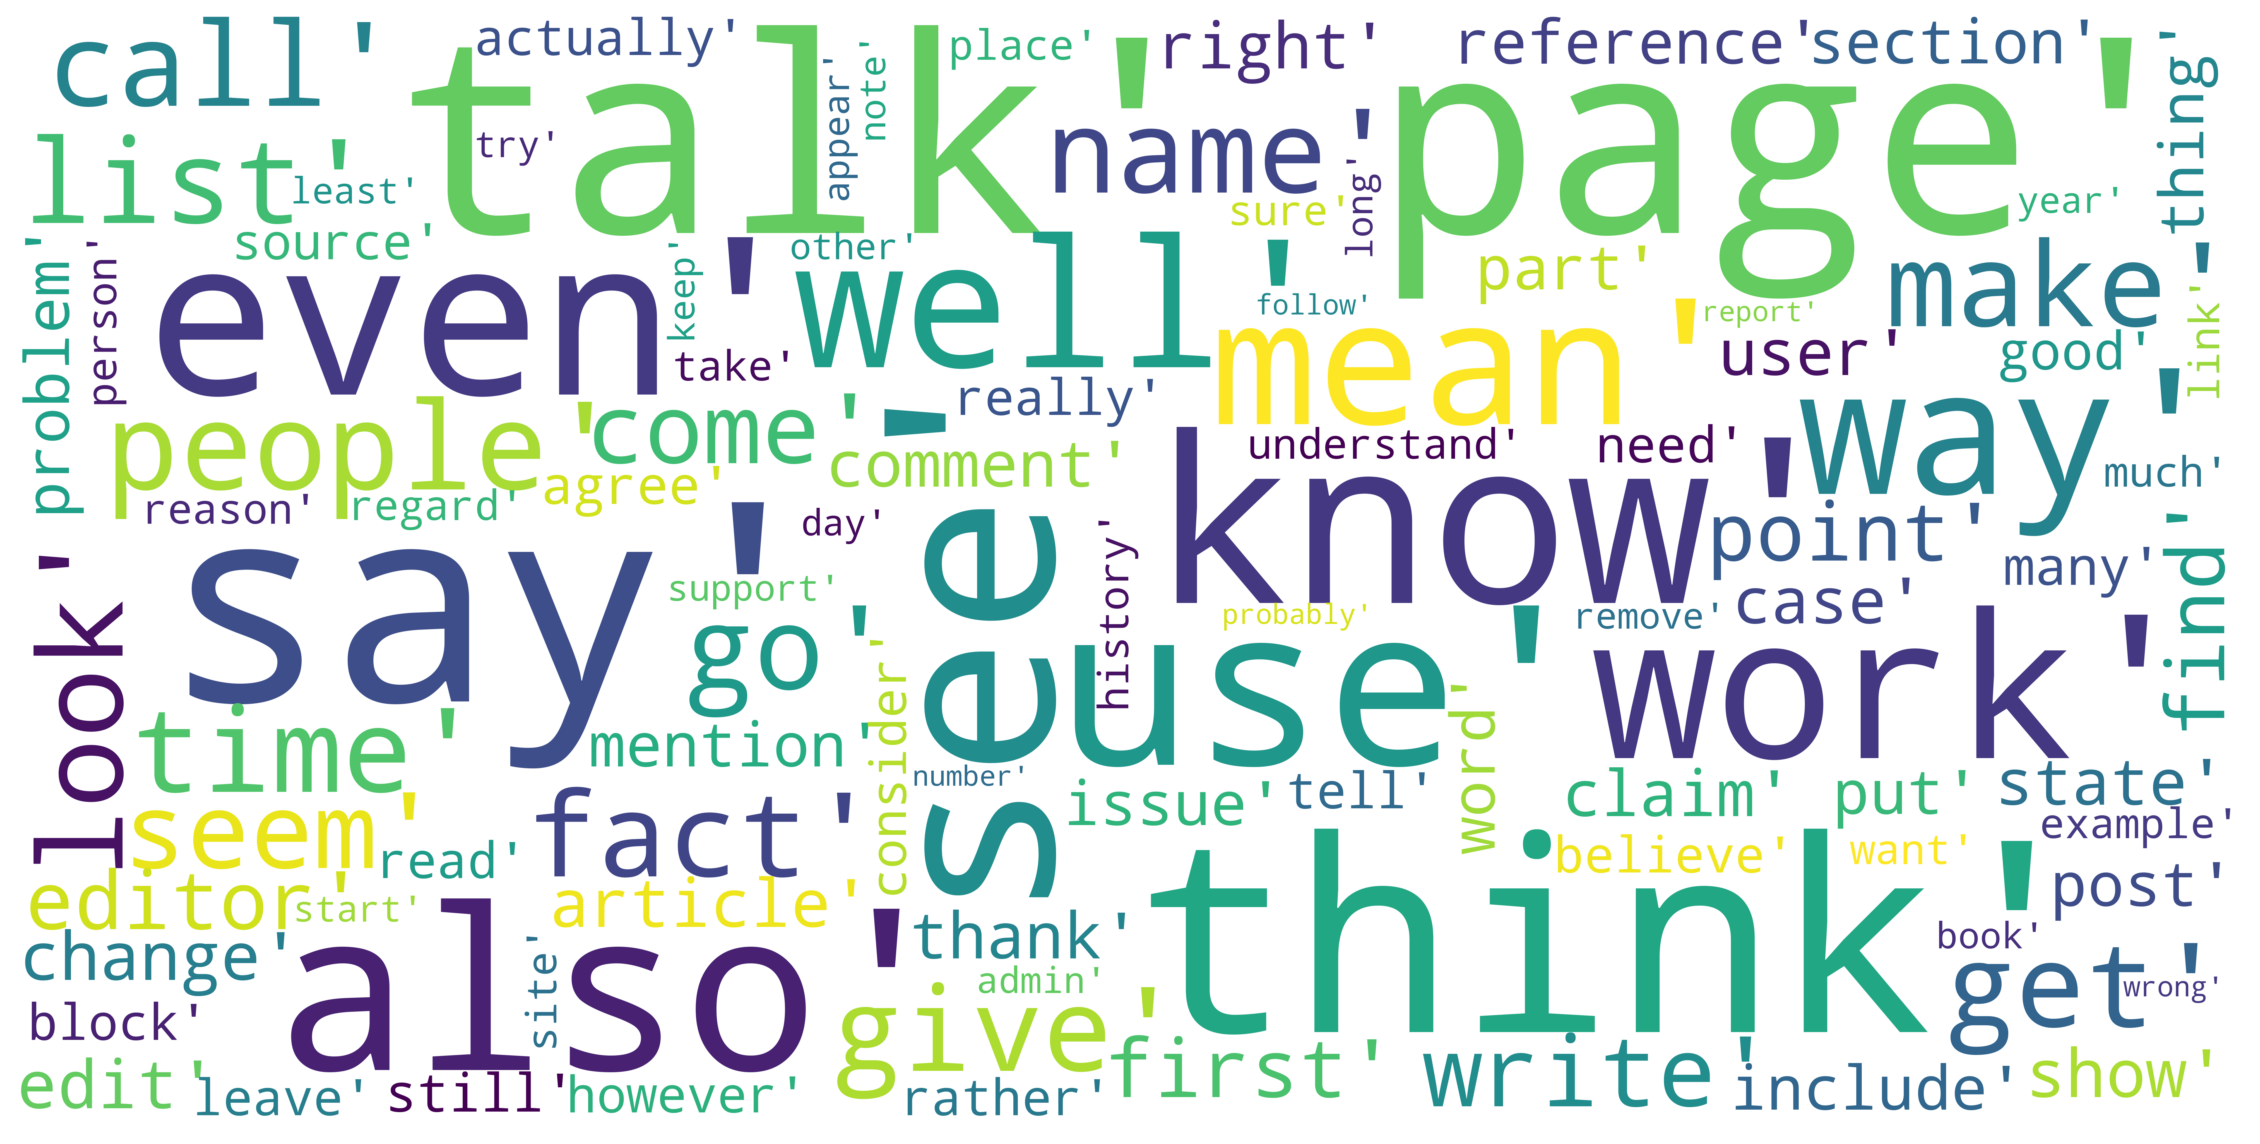

In [ ]:
threat = (' '.join(str(v) for v in df_threat['final']))

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white",
                      scale = 10,
                      width=800,
                      height=400
                     ).generate(threat)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

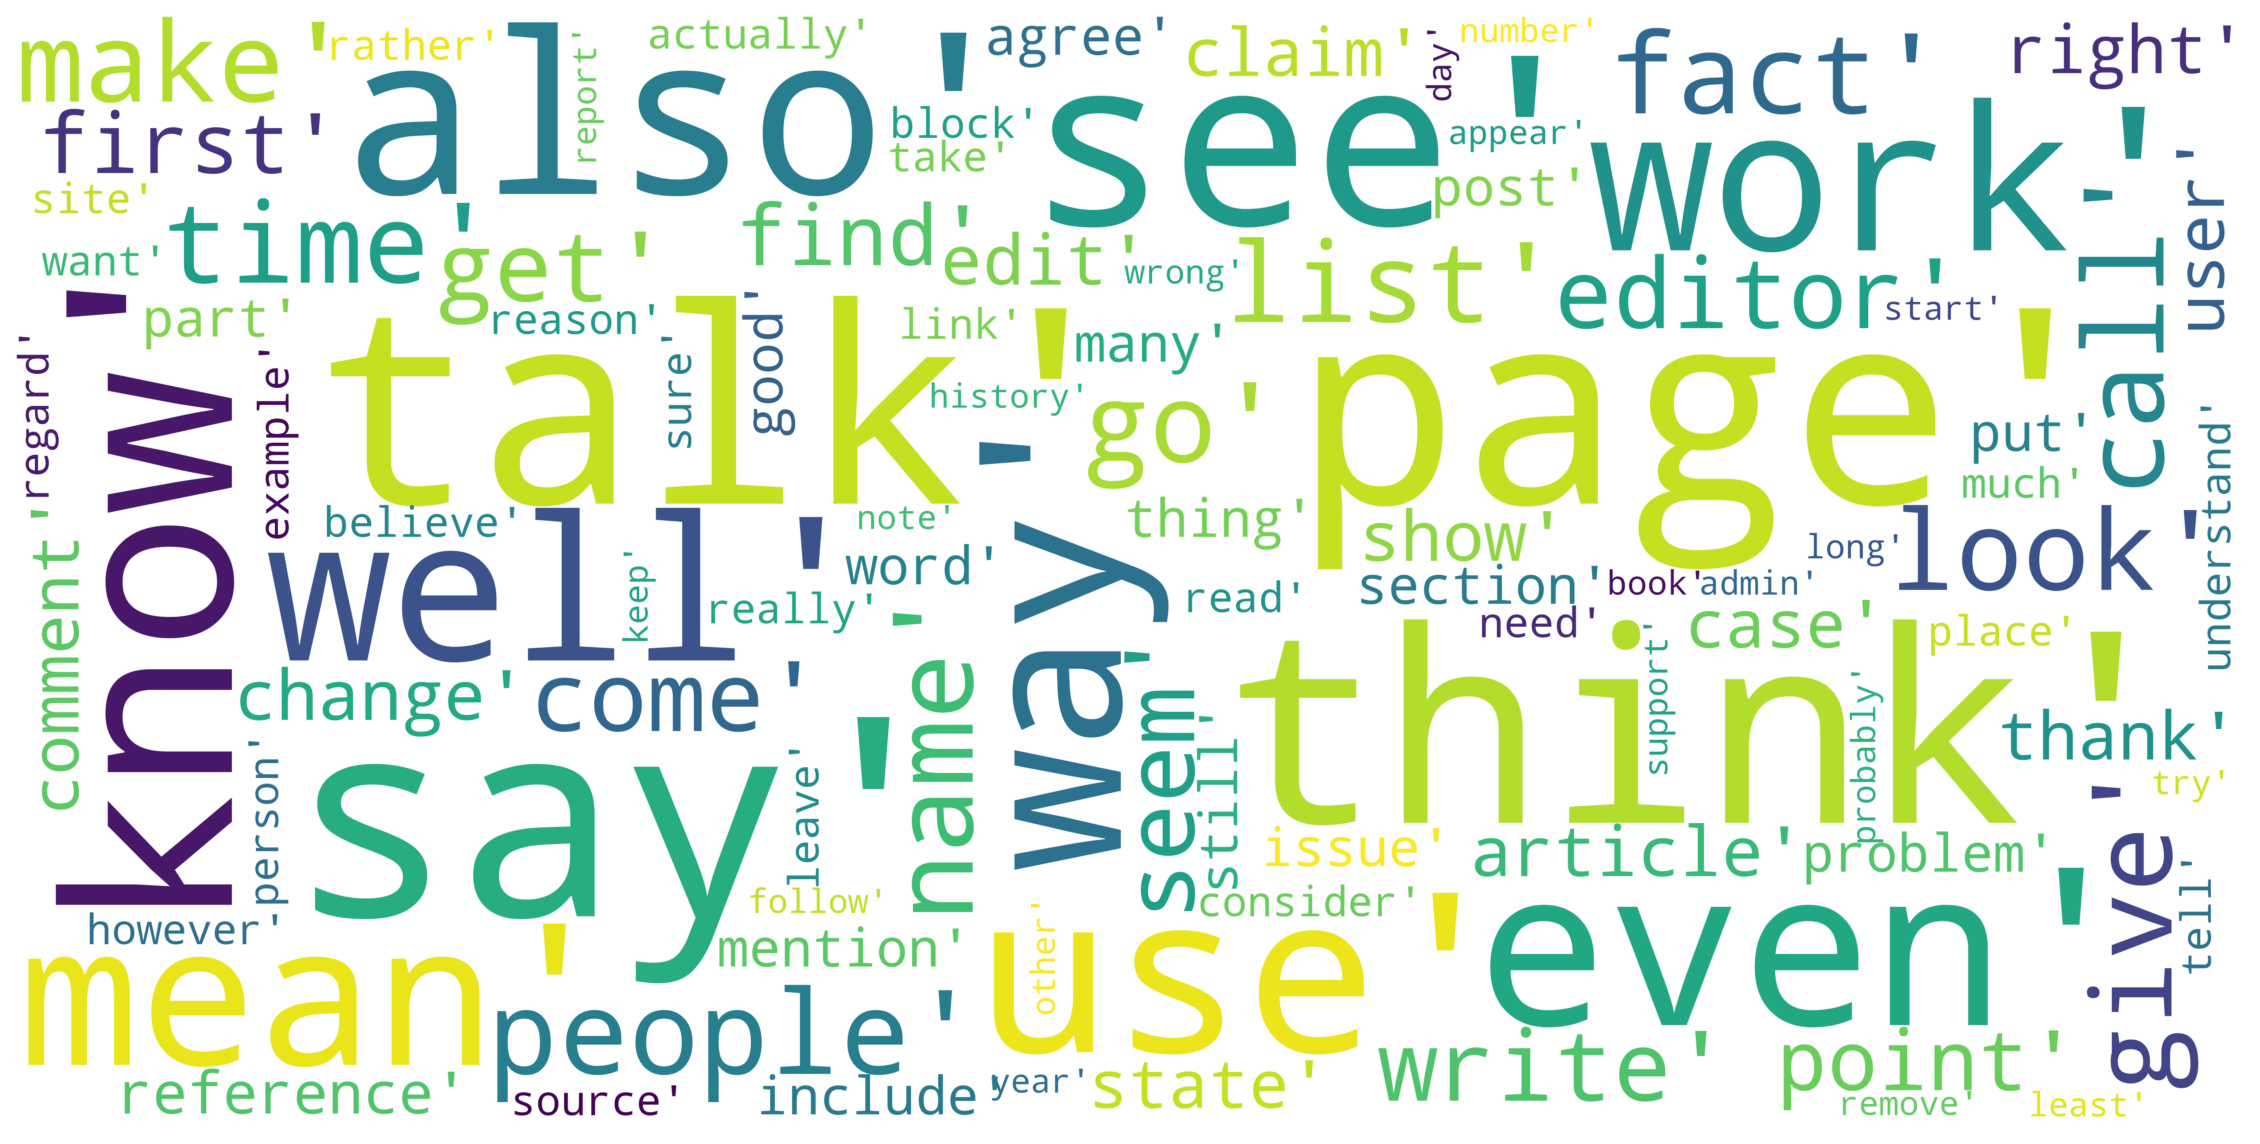

In [ ]:
abuse = (' '.join(str(v) for v in df_abuse['final']))

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white",
                      scale = 10,
                      width=800,
                      height=400
                     ).generate(threat)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

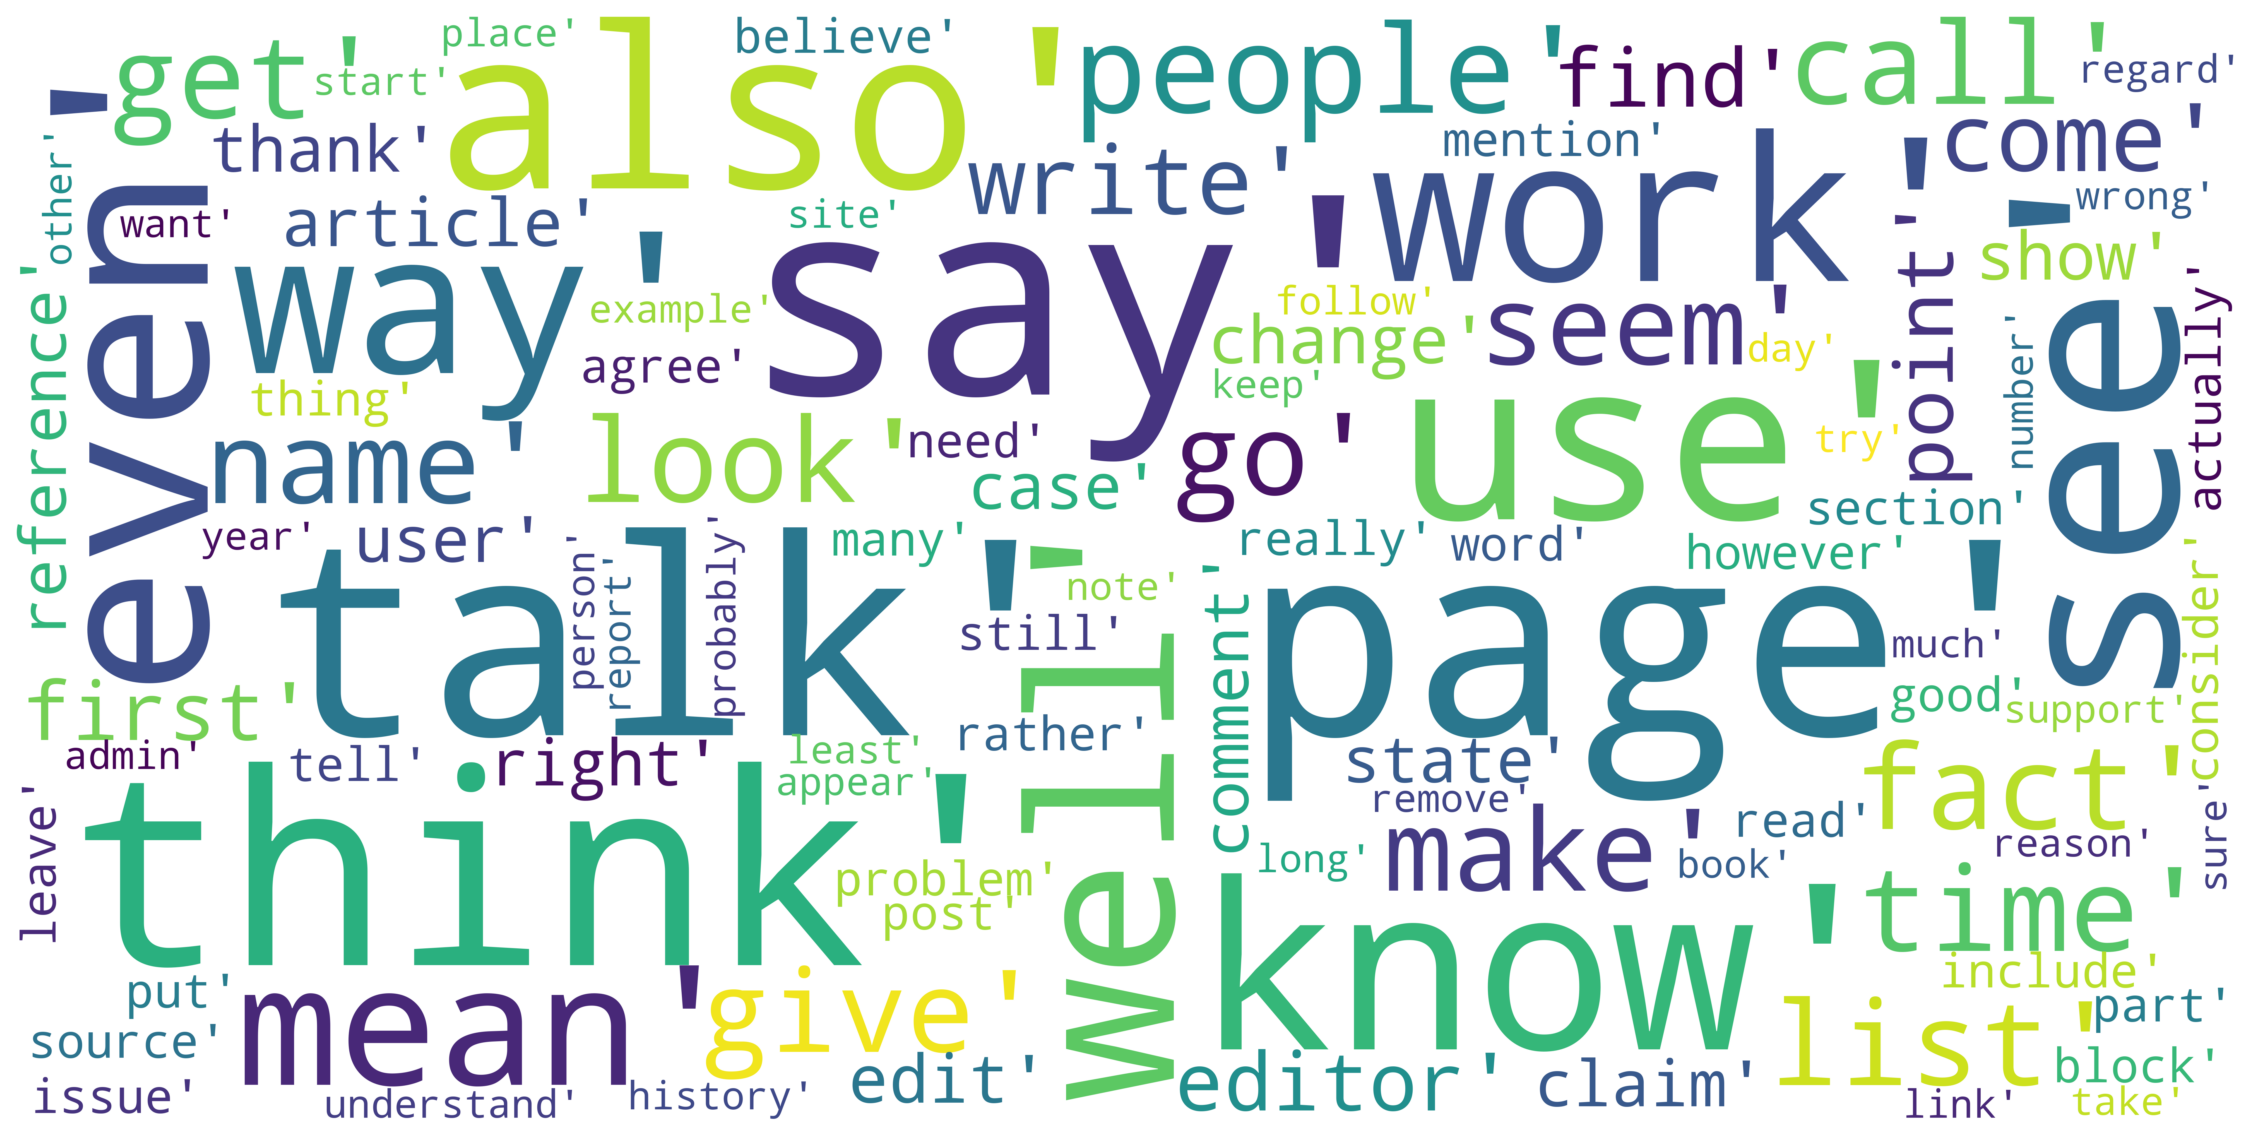

In [ ]:
loathe = (' '.join(str(v) for v in df_loathe['final']))

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white",
                      scale = 10,
                      width=800,
                      height=400
                     ).generate(threat)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, 
           interpolation="bilinear") 
plt.axis("off")
plt.show()

Since the dataset is huge , also imbalanced we are making the training dataset small and also get equal value counts for all types of comments

In [ ]:
df_malignant['malignant'].value_counts()

0.0    144277
1.0     15294
Name: malignant, dtype: int64

In [ ]:
malignant_1 = df_malignant[df_malignant['malignant'] == 1].iloc[0:5000,:]
malignant_1.shape

(5000, 3)

In [ ]:
malignant_0 = df_malignant[df_malignant['malignant'] == 0].iloc[0:5000,:]

In [ ]:
malignant = pd.concat([malignant_1, malignant_0], axis=0)
malignant.shape

(10000, 3)

In [ ]:
malignant = pd.concat([malignant_1, malignant_0], axis=0)
malignant.shape

df_highly_malignant[df_highly_malignant['highly_malignant'] == 1].count()

highly_malignant_1 = df_highly_malignant[df_highly_malignant['highly_malignant'] == 1].iloc[0:1595,:]
highly_malignant_0 = df_highly_malignant[df_highly_malignant['highly_malignant'] == 0].iloc[0:1595,:]
highly_malignant = pd.concat([highly_malignant_1, highly_malignant_0], axis=0)
highly_malignant.shape

df_rude[df_rude['rude'] == 1].count()

rude_1 = df_rude[df_rude['rude'] == 1].iloc[0:8449,:]
rude_0 = df_rude[df_rude['rude'] == 0].iloc[0:8449,:]
rude = pd.concat([rude_1, rude_0], axis=0)
rude.shape

df_threat[df_threat['threat'] == 1].count()

threat_1 = df_threat[df_threat['threat'] == 1].iloc[0:478,:]
threat_0 = df_threat[df_threat['threat'] == 0].iloc[0:478,:]  
threat = pd.concat([threat_1, threat_0], axis=0)
threat.shape

df_abuse[df_abuse['abuse'] == 1].count()

abuse_1 = df_abuse[df_abuse['abuse'] == 1].iloc[0:7877,:]
abuse_0 = df_abuse[df_abuse['abuse'] == 0].iloc[0:7877,:]
abuse = pd.concat([abuse_1, abuse_0], axis=0)
abuse.shape

df_loathe[df_loathe['loathe'] == 1].count()

loathe_1 = df_loathe[df_loathe['loathe'] == 1].iloc[0:1405,:] 
loathe_0 = df_loathe[df_loathe['loathe'] == 0].iloc[0:1405,:] 
loathe = pd.concat([loathe_1, loathe_0], axis=0)
loathe.shape

(2810, 3)

In [ ]:
df['final'] = df['final'].apply(lambda x: ' '.join(x))

In [ ]:
df_malignant = df.loc[:,['id','final','malignant']]
df_highly_malignant = df.loc[:,['id','final','highly_malignant']]

df_rude = df.loc[:,['id','final','rude']]

df_threat = df.loc[:,['id','final','threat']]

df_abuse = df.loc[:,['id','final','abuse']]

df_loathe = df.loc[:,['id','final','loathe']]


**Training**:
Here we are perform machine learining for all types of comments seperately

Here we use only 4 ML algorithms

In [ ]:
svc = LinearSVC()
lr = LogisticRegression()
mnb = MultinomialNB()
bnb = BernoulliNB()

Malignant comments

Converting the dataframe into compressed data format by using TFIDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize,
                               stop_words=stop_words,
                               ngram_range=(1,1))
tfidf_data = tfidf_counts.fit_transform(malignant['final'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                    malignant['malignant'], 
                                                                    test_size = 0.2, 
                                                                    random_state = 0)

Preparing the model function

In [ ]:
def tfidfModel(model):
    print(model.__class__.__name__)
    model.fit(X_train_tfidf,y_train_tfidf)
    y_pred = model.predict(X_train_tfidf)
    pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test_tfidf,pred)*100
    print(f"Accuracy Score:", accuracy)
    print("\n")   
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test_tfidf,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test_tfidf,pred)}\n")

From the diffrent classifcation, we find LinearSVC algorithm gets more accuracy or Malignant comments

In [ ]:
for model in [lr,svc,bnb,mnb]:
    tfidfModel(model)

LogisticRegression
Accuracy Score: 87.9


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1012
         1.0       0.90      0.85      0.87       988

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Confusion Matrix : 
 [[914  98]
 [144 844]]

LinearSVC
Accuracy Score: 88.7


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1012
         1.0       0.91      0.86      0.88       988

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion Matrix : 
 [[924  88]
 [138 850]]

BernoulliNB
Accuracy Score: 71.75


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0

ROC curve

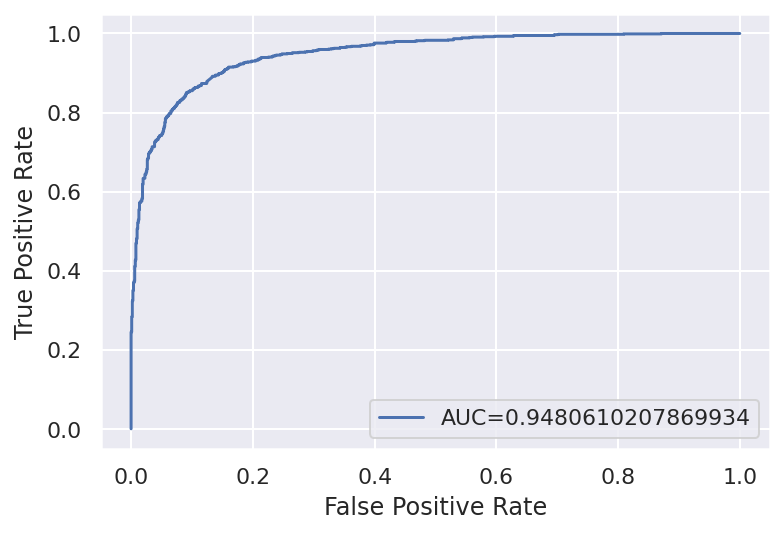

In [ ]:
y_pred_proba = lr.predict_proba(X_test_tfidf)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Highly Malignant comments

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize,
                               stop_words=stop_words,
                               ngram_range=(1,1))
tfidf_data = tfidf_counts.fit_transform(highly_malignant['final'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                    highly_malignant['highly_malignant'], 
                                                                    test_size = 0.2, 
                                                                    random_state = 0)

From the diffrent classifcation, we find MultinomialNB algorithm gets more accuracy or Highly Malignant comments

In [ ]:
for model in [lr,svc,bnb,mnb]:
    tfidfModel(model)

LogisticRegression
Accuracy Score: 90.59561128526646


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       311
         1.0       0.96      0.85      0.90       327

    accuracy                           0.91       638
   macro avg       0.91      0.91      0.91       638
weighted avg       0.91      0.91      0.91       638

Confusion Matrix : 
 [[300  11]
 [ 49 278]]

LinearSVC
Accuracy Score: 92.16300940438872


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       311
         1.0       0.95      0.90      0.92       327

    accuracy                           0.92       638
   macro avg       0.92      0.92      0.92       638
weighted avg       0.92      0.92      0.92       638

Confusion Matrix : 
 [[295  16]
 [ 34 293]]

BernoulliNB
Accuracy Score: 75.54858934169279


CLASSIFICATION REPORT : 
               precision    re

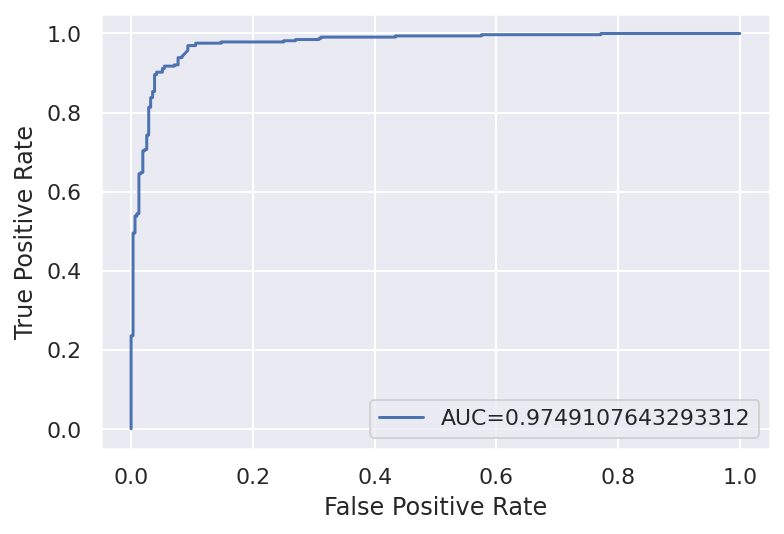

In [ ]:
y_pred_proba = lr.predict_proba(X_test_tfidf)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

RUDE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize,
                               stop_words=stop_words,
                               ngram_range=(1,1))
tfidf_data = tfidf_counts.fit_transform(rude['final'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                    rude['rude'], 
                                                                    test_size = 0.2, 
                                                                    random_state = 0) 

From the different classifcation, we find LinearSVC algorithm gets more accuracy for  Rude comments

In [ ]:
for model in [lr,svc,bnb,mnb]:
    tfidfModel(model)

LogisticRegression
Accuracy Score: 90.68047337278107


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1681
         1.0       0.95      0.86      0.90      1699

    accuracy                           0.91      3380
   macro avg       0.91      0.91      0.91      3380
weighted avg       0.91      0.91      0.91      3380

Confusion Matrix : 
 [[1602   79]
 [ 236 1463]]

LinearSVC
Accuracy Score: 91.86390532544378


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92      1681
         1.0       0.95      0.88      0.92      1699

    accuracy                           0.92      3380
   macro avg       0.92      0.92      0.92      3380
weighted avg       0.92      0.92      0.92      3380

Confusion Matrix : 
 [[1607   74]
 [ 201 1498]]

BernoulliNB
Accuracy Score: 73.04733727810651


CLASSIFICATION REPORT : 
               precisi

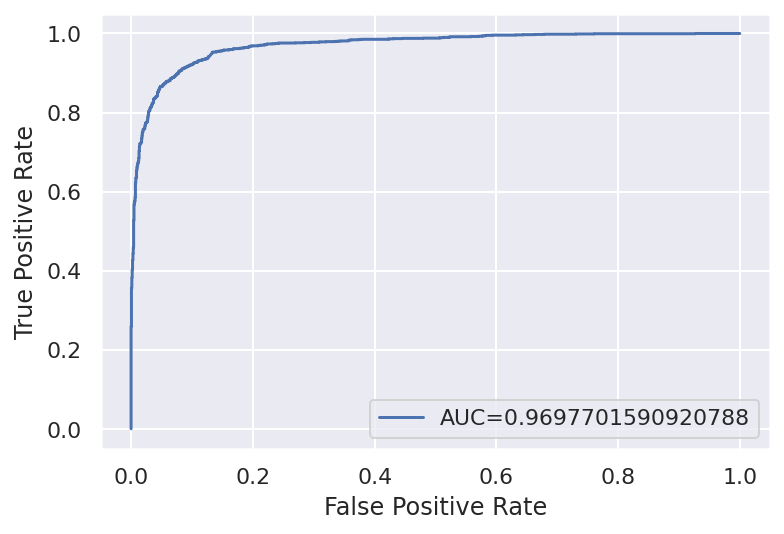

In [ ]:
y_pred_proba = lr.predict_proba(X_test_tfidf)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Threat

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize,
                               stop_words=stop_words,
                               ngram_range=(1,1))
tfidf_data = tfidf_counts.fit_transform(threat['final'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                    threat['threat'], 
                                                                    test_size = 0.2, 
                                                                    random_state = 0) 

From the different classifcation, we find LogisticRegression algorithm gets more accuracy for  threat comments

In [ ]:
for model in [lr,svc,bnb,mnb]:
    tfidfModel(model)

LogisticRegression
Accuracy Score: 90.10416666666666


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       103
         1.0       0.89      0.90      0.89        89

    accuracy                           0.90       192
   macro avg       0.90      0.90      0.90       192
weighted avg       0.90      0.90      0.90       192

Confusion Matrix : 
 [[93 10]
 [ 9 80]]

LinearSVC
Accuracy Score: 88.02083333333334


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.91      0.86      0.89       103
         1.0       0.85      0.90      0.87        89

    accuracy                           0.88       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.88      0.88      0.88       192

Confusion Matrix : 
 [[89 14]
 [ 9 80]]

BernoulliNB
Accuracy Score: 73.4375


CLASSIFICATION REPORT : 
               precision    recall  f1-score   s

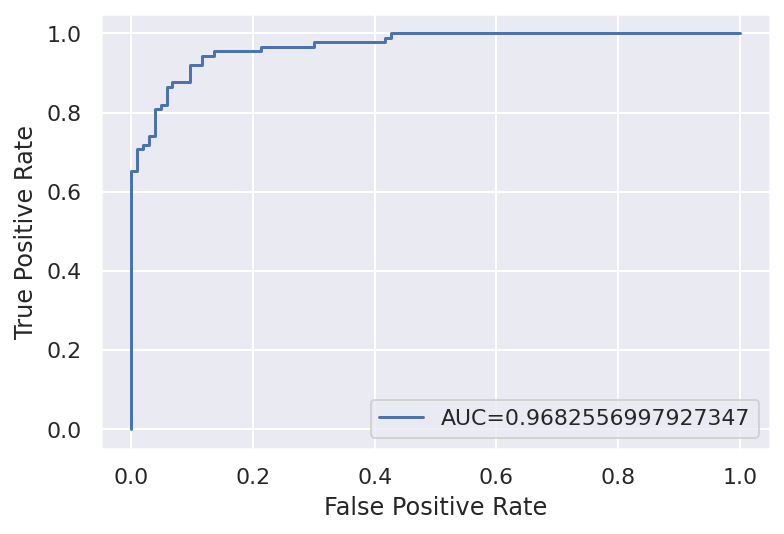

In [ ]:
y_pred_proba = lr.predict_proba(X_test_tfidf)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Abuse

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize,
                               stop_words=stop_words,
                               ngram_range=(1,1))
tfidf_data = tfidf_counts.fit_transform(abuse['final'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                    abuse['abuse'], 
                                                                    test_size = 0.2, 
                                                                    random_state = 0) 

From the ML algorithms we find LinearSVC gives more accuracy

In [ ]:
for model in [lr,svc,bnb,mnb]:
    tfidfModel(model)

LogisticRegression
Accuracy Score: 89.93970168200572


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1619
         1.0       0.93      0.86      0.89      1532

    accuracy                           0.90      3151
   macro avg       0.90      0.90      0.90      3151
weighted avg       0.90      0.90      0.90      3151

Confusion Matrix : 
 [[1524   95]
 [ 222 1310]]

LinearSVC
Accuracy Score: 90.0983814662012


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1619
         1.0       0.93      0.86      0.89      1532

    accuracy                           0.90      3151
   macro avg       0.90      0.90      0.90      3151
weighted avg       0.90      0.90      0.90      3151

Confusion Matrix : 
 [[1515  104]
 [ 208 1324]]

BernoulliNB
Accuracy Score: 73.40526816883529


CLASSIFICATION REPORT : 
               precisio

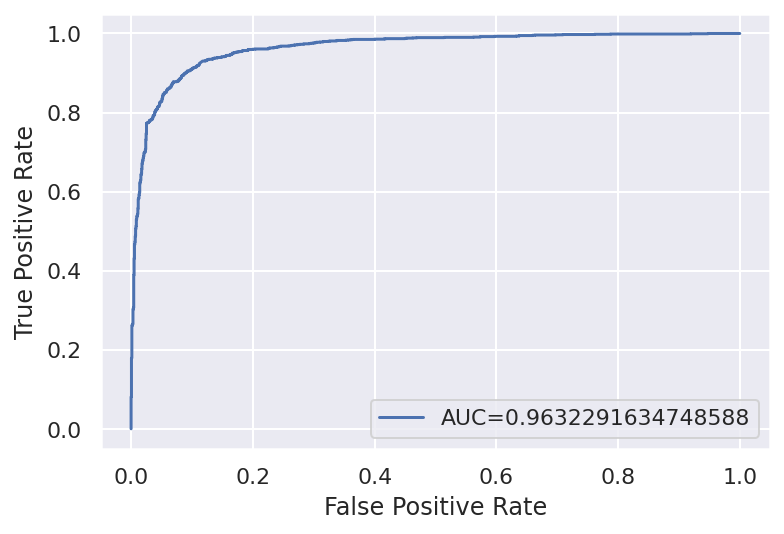

In [ ]:
y_pred_proba = lr.predict_proba(X_test_tfidf)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Loathe

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize,
                               stop_words=stop_words,
                               ngram_range=(1,1))
tfidf_data = tfidf_counts.fit_transform(loathe['final'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                    loathe['loathe'], 
                                                                    test_size = 0.2, 
                                                                    random_state = 0) 

From the ML algorithms we find LogisticRegression gives more accuracy

In [ ]:
for model in [lr,svc,bnb,mnb]:
    tfidfModel(model)

LogisticRegression
Accuracy Score: 90.39145907473309


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       287
         1.0       0.92      0.88      0.90       275

    accuracy                           0.90       562
   macro avg       0.91      0.90      0.90       562
weighted avg       0.90      0.90      0.90       562

Confusion Matrix : 
 [[267  20]
 [ 34 241]]

LinearSVC
Accuracy Score: 89.85765124555161


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       287
         1.0       0.91      0.88      0.89       275

    accuracy                           0.90       562
   macro avg       0.90      0.90      0.90       562
weighted avg       0.90      0.90      0.90       562

Confusion Matrix : 
 [[263  24]
 [ 33 242]]

BernoulliNB
Accuracy Score: 73.13167259786478


CLASSIFICATION REPORT : 
               precision    re

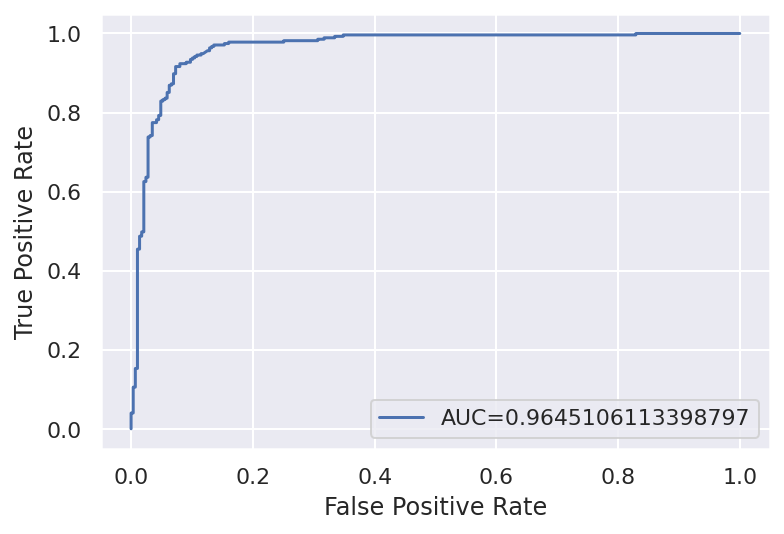

In [ ]:
y_pred_proba = lr.predict_proba(X_test_tfidf)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Test data:
For predicting test data, we already cleaned the test data along with training data.
Now we will take only predict it with malignant training model, where we limit the max feature to 2000, so the training and testing data will of same size

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(max_features = 2000,tokenizer= word_tokenize,
                               stop_words=stop_words,
                               ngram_range=(1,1))
tfidf = tfidf_counts.fit_transform(malignant['final'])

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf,
                                                                    malignant['malignant'], 
                                                                    test_size = 0.2, 
                                                                    random_state = 0) 

In [ ]:
lr.fit(X_train_tfidf,y_train_tfidf)
y_pred = lr.predict(X_train_tfidf)
pred = lr.predict(X_test_tfidf)
accuracy = accuracy_score(y_test_tfidf,pred)*100
print(f"Accuracy Score:", accuracy)
print("\n")   
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test_tfidf,pred)}")
print(f"Confusion Matrix : \n {confusion_matrix(y_test_tfidf,pred)}\n")

Accuracy Score: 86.5


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1012
         1.0       0.88      0.84      0.86       988

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000

Confusion Matrix : 
 [[903 109]
 [161 827]]



In [ ]:
test = df['final'].iloc[159571:161571]

In [ ]:
X_test_tfidf.shape

(2000, 2000)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_counts = TfidfVectorizer(max_features = 2000,tokenizer= word_tokenize,
                               stop_words=stop_words,
                               ngram_range=(1,1))
tf = tfidf_counts.fit_transform(test)

In [ ]:
y_pred = lr.predict(tf)

In [ ]:
accuracy = accuracy_score(y_test_tfidf,y_pred)*100
print(f"Accuracy Score:", accuracy)

Accuracy Score: 49.05


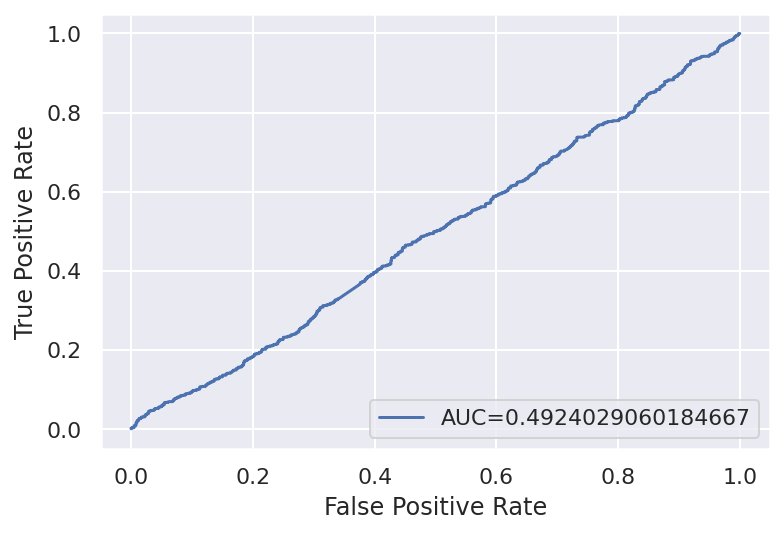

In [ ]:
y_pred_proba = lr.predict_proba(tf)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**Future Work:**
In NLP, there are different methods to predict the data, in future we will use transformers, bert model to improve the predict the data
During Testing, we have taken oly 4 basic classification algorithm, it will be tested different algorithms in future.
We will predict the data for all type of comments

**Limitation:**
We have not removed all kinds of stopwords as the dataset is huge
We have not used stemming as it give less accuracy
Limited training model algorithms
Only partial data is used for prediction
Hemming loss not calculated
